<div style="text-align:center; border-radius:15px; padding:15px; margin:0; font-size:300%; font-family:Arial, sans-serif; background-color:#0008ff; overflow:hidden; box-shadow:0 4px 8px rgba(0, 0, 0, 0.3);"><b>🎓 PROYECTO IAA </b></div>

### <div style="text-align:center; border-radius:15px; padding:15px; margin:0; font-size:50%; font-family:Arial, sans-serif; background-color:#BCE5FB; color:#013D41; overflow:hidden; box-shadow:0 4px 8px rgba(0, 0, 0, 0.3);"><b> 📚 Importación de librerías</b></div>

In [79]:
# Manipulación de datos
import pandas as pd
import numpy as np

# Visualización
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocesamiento
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler, OneHotEncoder

# Modelos de machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

# Redes Neuronales
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

# Ver progreso en ciclos
from tqdm import tqdm

# Métricas de evaluación
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

# Ignorar warnings
import warnings
warnings.filterwarnings('ignore')

# Modificación de visualizaciones
sns.set_theme()
pd.set_option('display.max_columns', None)

# <div style="border-radius:15px; padding:15px; margin:0; font-size:100%; font-family:Arial, sans-serif; background-color:#0074ff; overflow:hidden; box-shadow:0 4px 8px rgba(0, 0, 0, 0.3);"><b> 1. 📊 Análisis EDA </b></div>

In [3]:
df = pd.read_csv('./Student Depression Dataset.csv')
df.head()

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0


## <div style="border-radius:15px; padding:15px; margin:0; font-size:70%; font-family:Arial, sans-serif; background-color:#0b835f; overflow:hidden; box-shadow:0 4px 8px rgba(0, 0, 0, 0.3);"><b> 🔶 1.1 Revisión inicial general</b></div>

In [4]:
df.columns

Index(['id', 'Gender', 'Age', 'City', 'Profession', 'Academic Pressure',
       'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction',
       'Sleep Duration', 'Dietary Habits', 'Degree',
       'Have you ever had suicidal thoughts ?', 'Work/Study Hours',
       'Financial Stress', 'Family History of Mental Illness', 'Depression'],
      dtype='object')

In [5]:
df.shape

(27901, 18)

In [6]:
df.dtypes

id                                         int64
Gender                                    object
Age                                      float64
City                                      object
Profession                                object
Academic Pressure                        float64
Work Pressure                            float64
CGPA                                     float64
Study Satisfaction                       float64
Job Satisfaction                         float64
Sleep Duration                            object
Dietary Habits                            object
Degree                                    object
Have you ever had suicidal thoughts ?     object
Work/Study Hours                         float64
Financial Stress                         float64
Family History of Mental Illness          object
Depression                                 int64
dtype: object

Tenemos un dataset con más de 27k registros y 18 columnas, 17 features y 1 columna target

## <div style="border-radius:15px; padding:15px; margin:0; font-size:70%; font-family:Arial, sans-serif; background-color:#0b835f; overflow:hidden; box-shadow:0 4px 8px rgba(0, 0, 0, 0.3);"><b> 🔶 1.2 Análisis macro por variables</b></div>

In [7]:
def exploracion_inicial(dataframe):
    """
    Explora las columnas de un dataframe y devuelve un resumen detallado de cada una.
    
    """
    exploration_results = []

    for col in dataframe.columns:
        col_info = {}
        col_info['Column Name'] = col
        col_info['Type'] = dataframe[col].dtype
        col_info['Missing Values'] = dataframe[col].isnull().sum()
        col_info['Missing Percentage'] = (dataframe[col].isnull().sum() / len(dataframe)) * 100
        col_info['Cardinality'] = dataframe[col].nunique()

        # Para variables categóricas
        if not pd.api.types.is_numeric_dtype(dataframe[col]):
            col_info['Most Frequent'] = dataframe[col].value_counts().idxmax()
            col_info['Most Frequent Count'] = dataframe[col].value_counts().max()
            col_info['Binary'] = False  # Las categóricas no son binarias
            col_info['Is Constant'] = dataframe[col].nunique() == 1

        # Para variables numéricas
        if pd.api.types.is_numeric_dtype(dataframe[col]):
            col_info['Mean'] = dataframe[col].mean()
            col_info['Median'] = dataframe[col].median()
            col_info['Standard Deviation'] = dataframe[col].std()
            col_info['Q1'] = dataframe[col].quantile(0.25)
            col_info['Q3'] = dataframe[col].quantile(0.75)
            col_info['IQR'] = col_info['Q3'] - col_info['Q1']
            col_info['Binary'] = dataframe[col].nunique() == 2
            col_info['Is Constant'] = dataframe[col].nunique() == 1

        exploration_results.append(col_info)

    # Convertir los resultados en un DataFrame para visualización fácil
    results_df = pd.DataFrame(exploration_results)
    return results_df

In [8]:
exploracion_inicial(df)

,Column Name,Type,Missing Values,Missing Percentage,Cardinality,Mean,Median,Standard Deviation,Q1,Q3,IQR,Binary,Is Constant,Most Frequent,Most Frequent Count
0,id,int64,0,0.000000,27901,70442.149421,70684.00,40641.175216,35039.00,105818.00,70779.00,False,False,NaN,NaN
1,Gender,object,0,0.000000,2,NaN,NaN,NaN,NaN,NaN,NaN,False,False,Male,15547.0
2,Age,float64,0,0.000000,34,25.822300,25.00,4.905687,21.00,30.00,9.00,False,False,NaN,NaN
3,City,object,0,0.000000,52,NaN,NaN,NaN,NaN,NaN,NaN,False,False,Kalyan,1570.0
4,Profession,object,0,0.000000,14,NaN,NaN,NaN,NaN,NaN,NaN,False,False,Student,27870.0
5,Academic Pressure,float64,0,0.000000,6,3.141214,3.00,1.381465,2.00,4.00,2.00,False,False,NaN,NaN
6,Work Pressure,float64,0,0.000000,3,0.000430,0.00,0.043992,0.00,0.00,0.00,False,False,NaN,NaN
7,CGPA,float64,0,0.000000,332,7.656104,7.77,1.470707,6.29,8.92,2.63,False,False,NaN,NaN
8,Study Satisfaction,float64,0,0.000000,6,2.943837,3.00,1.361148,2.00,4.00,2.00,False,False,NaN,NaN
9,Job Satisfaction,float64,0,0.000000,5,0.000681,0.00,0.044394,0.00,0.00,0.00,False,False,NaN,NaN


### ✅ Contexto General del Dataset

- No hay datos faltantes, salvo 3 registros en **estrés financiero**.
- La columna **target** (Depresión) es **binaria**, ideal para clasificación.
- El dataset contiene datos de **52 ciudades** y **14 profesiones**.
- La mayoría de los encuestados ha tenido **pensamientos suicidas**.
- En promedio, las personas dedican **7.16 horas diarias** al trabajo/estudio.
- Predomina la **ausencia de antecedentes familiares** de enfermedades mentales.
- Hay **más personas con depresión** que sin ella en el dataset.
- La **edad media** de los encuestados es de **casi 26 años**.
- Fueron entrevistados más **hombres que mujeres**.

---

## <div style="border-radius:15px; padding:15px; margin:0; font-size:70%; font-family:Arial, sans-serif; background-color:#0b835f; overflow:hidden; box-shadow:0 4px 8px rgba(0, 0, 0, 0.3);"><b> 🔶 1.3 Análisis detallado por variables: Categóricas</b></div>

In [9]:
# Clasificar columnas en numéricas, categóricas y binarias
categorical = [var for var in df.columns if df[var].dtype == 'object']
numerical = [var for var in df.columns if df[var].dtype in ['int64', 'float64']]
binary = [var for var in numerical if df[var].nunique() == 2]  # Numéricas con solo 2 valores únicos

# Mostrar los resultados
print('Hay {} variables categóricas:'.format(len(categorical)))
print(categorical)
print('\nHay {} variables numéricas:'.format(len(numerical)))
print(numerical)
print('\nHay {} variables binarias:'.format(len(binary)))
print(binary)

Hay 8 variables categóricas:
['Gender', 'City', 'Profession', 'Sleep Duration', 'Dietary Habits', 'Degree', 'Have you ever had suicidal thoughts ?', 'Family History of Mental Illness']

Hay 10 variables numéricas:
['id', 'Age', 'Academic Pressure', 'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction', 'Work/Study Hours', 'Financial Stress', 'Depression']

Hay 1 variables binarias:
['Depression']


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

def analisis_columna_profundizado(dataframe, column_name):
    """
    Realiza un análisis más profundo de una columna específica, incluyendo estadísticas descriptivas
    y gráficos, con soporte explícito para variables binarias (dos valores únicos).

    Args:
        dataframe (pd.DataFrame): El DataFrame que contiene la columna.
        column_name (str): El nombre de la columna a analizar.

    Returns:
        None: Genera gráficos y muestra estadísticas descriptivas.
    """
    if column_name not in dataframe.columns:
        raise ValueError(f"La columna '{column_name}' no existe en el DataFrame.")

    col_data = dataframe[column_name]

    print(f"Análisis profundo para la columna: {column_name}")
    print("-" * 50)

    # Tipo de dato y valores nulos
    print(f"Tipo de dato: {col_data.dtype}")
    print(f"Valores nulos: {col_data.isnull().sum()} ({(col_data.isnull().sum() / len(col_data)) * 100:.2f}%)")
    print(f"Cardinalidad: {col_data.nunique()} valores únicos")

    # Análisis para variables binarias (cardinalidad de 2)
    if col_data.nunique() == 2:
        print("\nDistribución de valores binarios:")
        print(col_data.value_counts(normalize=True) * 100)

        # Gráfico de barras para distribución binaria
        plt.figure(figsize=(6, 4))
        sns.countplot(data=dataframe, x=column_name, palette="viridis")
        plt.title(f"Distribución Binaria - {column_name}")
        plt.xlabel(column_name)
        plt.ylabel("Frecuencia")
        plt.show()

    # Análisis para variables numéricas
    elif pd.api.types.is_numeric_dtype(col_data):
        # Estadísticas descriptivas
        print("\nEstadísticas descriptivas:")
        print(col_data.describe())

        # Detección de outliers
        Q1 = col_data.quantile(0.25)
        Q3 = col_data.quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        print(f"Outliers (por debajo): {sum(col_data < lower_bound)}")
        print(f"Outliers (por encima): {sum(col_data > upper_bound)}")

        # Gráficos para análisis numérico
        plt.figure(figsize=(12, 4))

        # Histograma
        plt.subplot(1, 2, 1)
        sns.histplot(col_data, kde=True, bins=30, color='blue')
        plt.title(f"Distribución de {column_name}")
        plt.xlabel(column_name)
        plt.ylabel("Frecuencia")

        # Boxplot
        plt.subplot(1, 2, 2)
        sns.boxplot(data=col_data, orient='h', color='orange')
        plt.title(f"Boxplot de {column_name}")

        plt.tight_layout()
        plt.show()

    # Análisis para variables categóricas
    elif pd.api.types.is_object_dtype(col_data) or pd.api.types.is_categorical_dtype(col_data):
        print("\nDistribución de categorías:")
        print(col_data.value_counts(normalize=True) * 100)

        # Gráfico de barras
        plt.figure(figsize=(8, 6))
        sns.countplot(data=dataframe, y=column_name, order=col_data.value_counts().index, palette="viridis")
        plt.title(f"Distribución de Categorías - {column_name}")
        plt.xlabel("Frecuencia")
        plt.ylabel(column_name)
        plt.show()


### <div style="border-radius:15px; padding:15px; margin:0; font-size:60%; font-family:Arial, sans-serif; background-color:rgb(230, 184, 34); color:black; overflow:hidden; box-shadow:0 4px 8px rgba(0, 0, 0, 0.3);"><b> 🟡 1.3.1 Gender </b></div>

Análisis profundo para la columna: Gender
--------------------------------------------------
Tipo de dato: object
Valores nulos: 0 (0.00%)
Cardinalidad: 2 valores únicos

Distribución de valores binarios:
Gender
Male      55.722017
Female    44.277983
Name: proportion, dtype: float64


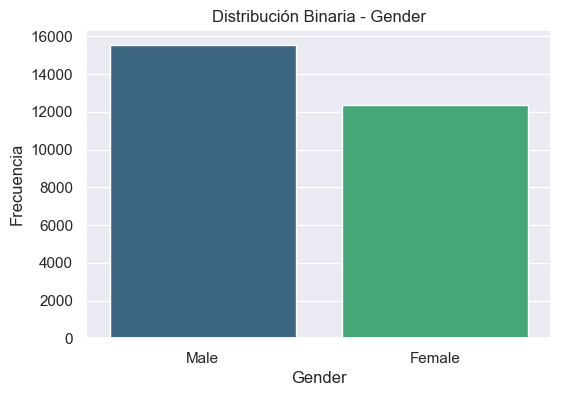

In [11]:
analisis_columna_profundizado(df, 'Gender')

Esta columna se queda tal como está, pues no cuenta con valores nulos, además encontramos una muestra equilibrada entre los dos géneros. Una vez terminemos el EDA hacemos el encoding.

### <div style="border-radius:15px; padding:15px; margin:0; font-size:60%; font-family:Arial, sans-serif; background-color:rgb(230, 184, 34); color:black; overflow:hidden; box-shadow:0 4px 8px rgba(0, 0, 0, 0.3);"><b> 🟡 1.3.2 City </b></div>

Análisis profundo para la columna: City
--------------------------------------------------
Tipo de dato: object
Valores nulos: 0 (0.00%)
Cardinalidad: 52 valores únicos

Distribución de categorías:
City
Kalyan                5.627038
Srinagar              4.917386
Hyderabad             4.802695
Vasai-Virar           4.623490
Lucknow               4.139637
Thane                 4.082291
Ludhiana              3.981936
Agra                  3.921006
Surat                 3.863661
Kolkata               3.820652
Jaipur                3.713129
Patna                 3.609190
Visakhapatnam         3.472994
Pune                  3.469410
Ahmedabad             3.408480
Bhopal                3.347550
Chennai               3.171929
Meerut                2.956883
Rajkot                2.924626
Delhi                 2.752590
Bangalore             2.749005
Ghaziabad             2.670155
Mumbai                2.505287
Vadodara              2.487366
Varanasi              2.455109
Nagpur                

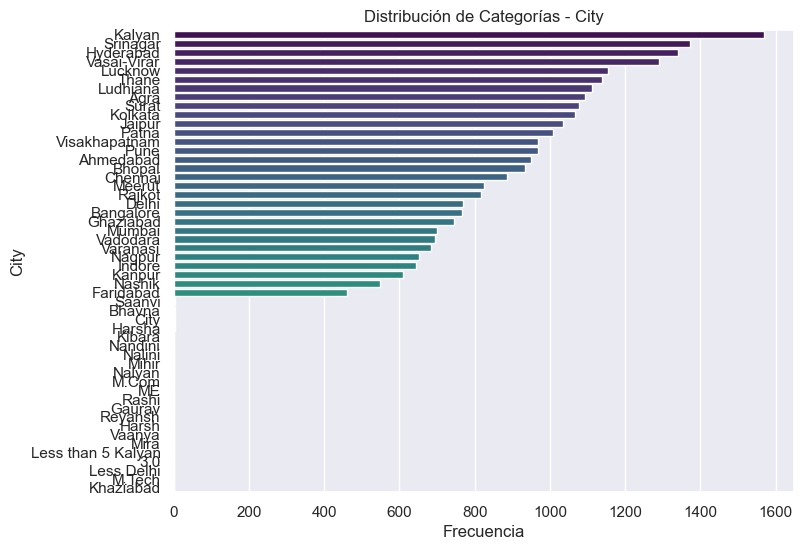

In [12]:
analisis_columna_profundizado(df, 'City')

La columna City presenta una alta cardinalidad, con una gran cantidad de valores únicos, muchos de los cuales tienen una frecuencia extremadamente baja. Mantener la columna tal como está podría generar problemas de representación y ruido durante el entrenamiento del modelo. Por ello, se decidió conservar únicamente las categorías cuya representación supera el 2% del total de registros, agrupando el resto bajo una nueva categoría denominada Others.

Este umbral se justifica al observar la distribución porcentual de la columna: hasta la ciudad de Faridabad, los valores se mantienen por encima del 1.6%, pero a partir de registros como Saanvi (0.007168%) y siguientes, el porcentaje cae abruptamente, reflejando una ruptura clara en la frecuencia.

Además, dentro de las categorías menos representadas se identifican errores evidentes y valores atípicos, como:

* Errores tipográficos: Khaziabad (probablemente Ghaziabad), Nalyan (posiblemente Kalyan), entre otros.
* Nombres personales: Bhavna, Harsha, Mira, etc.
* Títulos académicos: M.Com, M.Tech, ME.
* Valores ambiguos: Less Delhi, City, 3.0.

Por estas razones, agrupar todas estas categorías de baja frecuencia en Others no solo mejora la calidad de los datos, sino que también reduce el riesgo de sobreajuste y mejora la generalización del modelo.

In [13]:
valid_cities = df['City'].value_counts(normalize=True)
valid_cities = valid_cities[valid_cities > 0.02].index

df['City_clean'] = df['City'].apply(lambda x: x if x in valid_cities else 'Other')


In [14]:
print(f"Hay un total de: {df['City_clean'].value_counts().sum()} registros en la columna nueva")
print(f"Hay un total de: {df['City'].value_counts().sum()} registros en la columna antigua")



Hay un total de: 27901 registros en la columna nueva
Hay un total de: 27901 registros en la columna antigua


Comprobamos la nueva distribución de la columna que creamos

Análisis profundo para la columna: City_clean
--------------------------------------------------
Tipo de dato: object
Valores nulos: 0 (0.00%)
Cardinalidad: 29 valores únicos

Distribución de categorías:
City_clean
Kalyan           5.627038
Srinagar         4.917386
Hyderabad        4.802695
Vasai-Virar      4.623490
Lucknow          4.139637
Thane            4.082291
Ludhiana         3.981936
Agra             3.921006
Surat            3.863661
Kolkata          3.820652
Jaipur           3.713129
Other            3.705960
Patna            3.609190
Visakhapatnam    3.472994
Pune             3.469410
Ahmedabad        3.408480
Bhopal           3.347550
Chennai          3.171929
Meerut           2.956883
Rajkot           2.924626
Delhi            2.752590
Bangalore        2.749005
Ghaziabad        2.670155
Mumbai           2.505287
Vadodara         2.487366
Varanasi         2.455109
Nagpur           2.333250
Indore           2.304577
Kanpur           2.182717
Name: proportion, dtype: float6

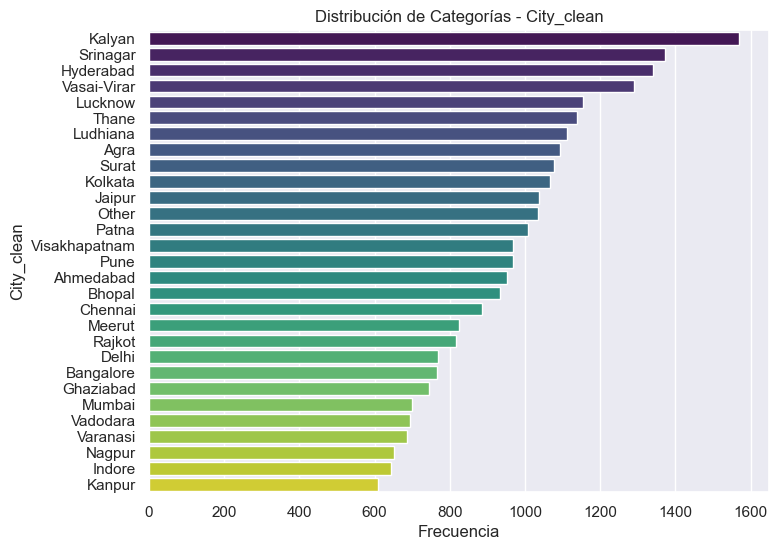

In [15]:
analisis_columna_profundizado(df, 'City_clean')

Eliminamos la columna original que ya no nos sirve. 

In [16]:
df.drop(columns= 'City', inplace = True)

### <div style="border-radius:15px; padding:15px; margin:0; font-size:60%; font-family:Arial, sans-serif; background-color:rgb(230, 184, 34); color:black; overflow:hidden; box-shadow:0 4px 8px rgba(0, 0, 0, 0.3);"><b> 🟡 1.3.3 Profession </b></div>

Análisis profundo para la columna: Profession
--------------------------------------------------
Tipo de dato: object
Valores nulos: 0 (0.00%)
Cardinalidad: 14 valores únicos

Distribución de categorías:
Profession
Student                   99.888893
Architect                  0.028673
Teacher                    0.021505
Digital Marketer           0.010752
Content Writer             0.007168
Chef                       0.007168
Doctor                     0.007168
Pharmacist                 0.007168
Civil Engineer             0.003584
UX/UI Designer             0.003584
Educational Consultant     0.003584
Manager                    0.003584
Lawyer                     0.003584
Entrepreneur               0.003584
Name: proportion, dtype: float64


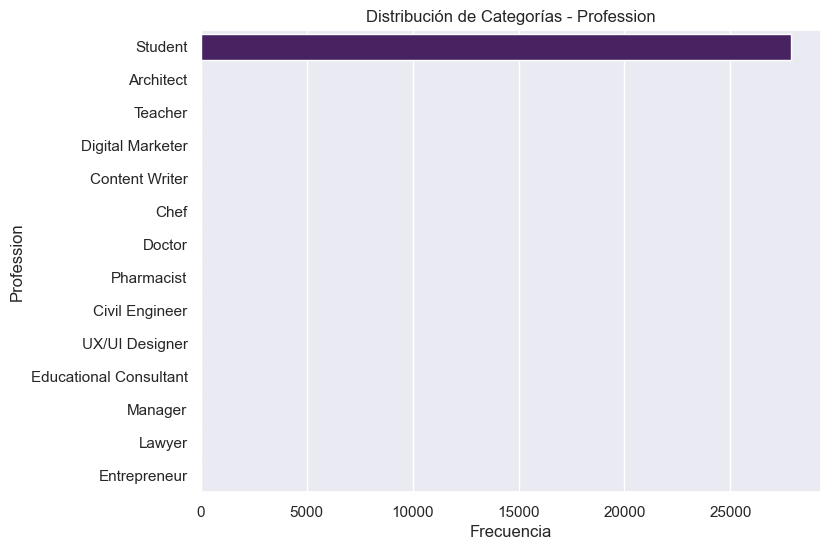

In [17]:
analisis_columna_profundizado(df, 'Profession')

En nuestro caso de negocio, orientamos el modelo inicial hacia una universidad, por ello, filtramos el df para quedarnos solamente con los registros de estudiantes y eliminamos las demás profesiones que representan una muestra mínima. Esto nos ayuda a orientar el caso de negocio y evitar futuro overfitting con profesiones que no aportan valor en el entrenamiento porque su aparición está muy desbalanceada respecto a los estudiantes. 

In [18]:
df = df[df['Profession'] == 'Student'].copy()


In [19]:
df['Profession'].value_counts()


Profession
Student    27870
Name: count, dtype: int64

Como la columna ya está filtrada y nos quedamos con un df únicamente de estudiantes, eliminamos esta columna que ya no aporta información, es una constante. 

In [20]:
df.drop (columns = 'Profession', inplace = True)

### <div style="border-radius:15px; padding:15px; margin:0; font-size:60%; font-family:Arial, sans-serif; background-color:rgb(230, 184, 34); color:black; overflow:hidden; box-shadow:0 4px 8px rgba(0, 0, 0, 0.3);"><b> 🟡 1.3.4 Sleep duration </b></div>

Análisis profundo para la columna: Sleep Duration
--------------------------------------------------
Tipo de dato: object
Valores nulos: 0 (0.00%)
Cardinalidad: 5 valores únicos

Distribución de categorías:
Sleep Duration
Less than 5 hours    29.791891
7-8 hours            26.325798
5-6 hours            22.163617
More than 8 hours    21.654108
Others                0.064586
Name: proportion, dtype: float64


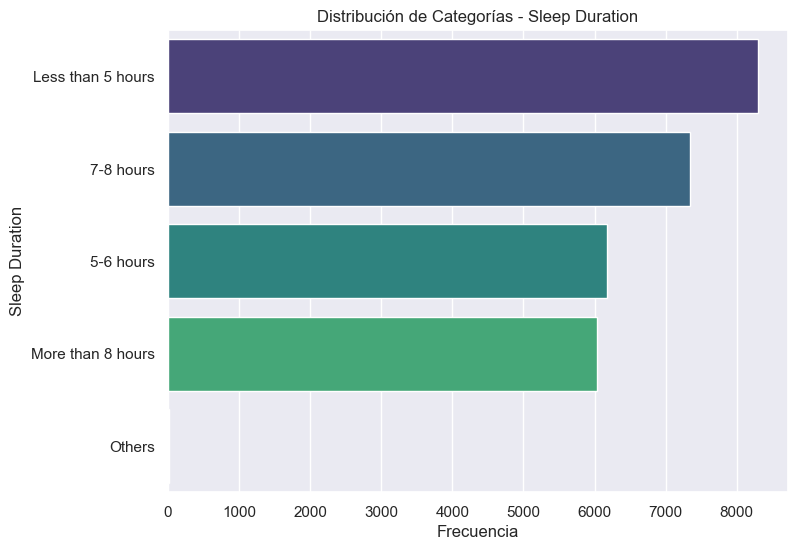

In [21]:
analisis_columna_profundizado(df, 'Sleep Duration')

Esta columna solamente vamos a cambiar 'Others' a Nan, ya que su proporción es muy baja. La cambiamos a Nan ahora en la limpieza por si más adelante queremos imputar con la moda sea más fácil. No eliminamos los registros porque perderíamos información de filas completas, que no queremos. 

In [22]:
df['Sleep Duration'] = df['Sleep Duration'].replace('Others', np.nan)


### <div style="border-radius:15px; padding:15px; margin:0; font-size:60%; font-family:Arial, sans-serif; background-color:rgb(230, 184, 34); color:black; overflow:hidden; box-shadow:0 4px 8px rgba(0, 0, 0, 0.3);"><b> 🟡 1.3.5 Dietary Habits </b></div>

Análisis profundo para la columna: Dietary Habits
--------------------------------------------------
Tipo de dato: object
Valores nulos: 0 (0.00%)
Cardinalidad: 4 valores únicos

Distribución de categorías:
Dietary Habits
Unhealthy    36.989595
Moderate     35.557948
Healthy      27.409401
Others        0.043057
Name: proportion, dtype: float64


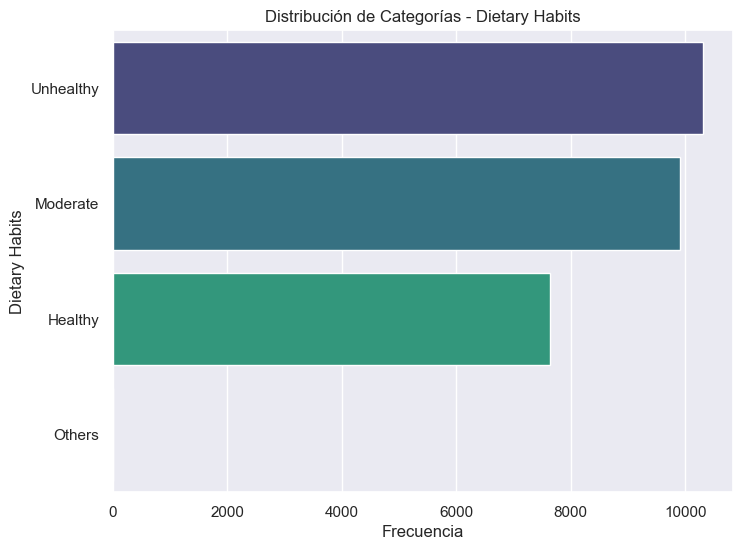

In [23]:
analisis_columna_profundizado(df,'Dietary Habits')

Nuevamente, cambiamos Others por Nan por si imputamos por la moda más adelante

In [24]:
df['Dietary Habits'] = df['Dietary Habits'].replace('Others', np.nan)

### <div style="border-radius:15px; padding:15px; margin:0; font-size:60%; font-family:Arial, sans-serif; background-color:rgb(230, 184, 34); color:black; overflow:hidden; box-shadow:0 4px 8px rgba(0, 0, 0, 0.3);"><b> 🟡 1.3.6 Deegree </b></div>

Análisis profundo para la columna: Degree
--------------------------------------------------
Tipo de dato: object
Valores nulos: 0 (0.00%)
Cardinalidad: 28 valores únicos

Distribución de categorías:
Degree
Class 12    21.815572
B.Ed         6.688195
B.Com        5.403660
B.Arch       5.299605
BCA          5.138141
MSc          4.255472
B.Tech       4.133477
MCA          3.738787
M.Tech       3.667025
BHM          3.308217
BSc          3.175457
M.Ed         2.945820
B.Pharm      2.902763
M.Com        2.630068
MBBS         2.493721
BBA          2.493721
LLB          2.407607
BE           2.195910
BA           2.149264
M.Pharm      2.084679
MD           2.041622
MBA          2.016505
MA           1.944743
PhD          1.869394
LLM          1.725870
MHM          0.685325
ME           0.663796
Others       0.125583
Name: proportion, dtype: float64


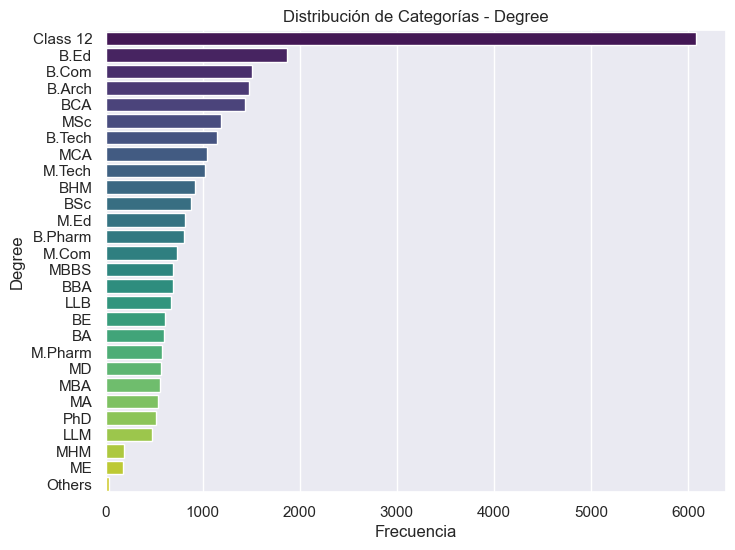

In [25]:
analisis_columna_profundizado(df, 'Degree')

Vamos a hacer el mismo tratamiento que la columa de ciudad, pues laa columna presenta una distribución moderadamente balanceada en las primeras categorías, pero con una caída notoria en las menos frecuentes. Se decidió conservar únicamente aquellas categorías cuya representación es mayor al 2.4% del total, agrupando las restantes en una nueva categoría llamada ´Others´.

De esta manera se logra reducir la cardinalidad de la variable y evitar el sobreajuste en modelos que no manejan bien categorías poco frecuentes, mientras se preserva el valor informativo de las principales formaciones académicas.

In [26]:
top_degrees = df['Degree'].value_counts(normalize=True)
top_degrees = top_degrees[top_degrees > 0.024].index

df['Degree_clean'] = df['Degree'].apply(lambda x: x if x in top_degrees else 'Other')
#Después vamos a verificar otra vez con nuestra función de análisis de columna

Análisis profundo para la columna: Degree_clean
--------------------------------------------------
Tipo de dato: object
Valores nulos: 0 (0.00%)
Cardinalidad: 18 valores únicos

Distribución de categorías:
Degree_clean
Class 12    21.815572
Other       17.502691
B.Ed         6.688195
B.Com        5.403660
B.Arch       5.299605
BCA          5.138141
MSc          4.255472
B.Tech       4.133477
MCA          3.738787
M.Tech       3.667025
BHM          3.308217
BSc          3.175457
M.Ed         2.945820
B.Pharm      2.902763
M.Com        2.630068
MBBS         2.493721
BBA          2.493721
LLB          2.407607
Name: proportion, dtype: float64


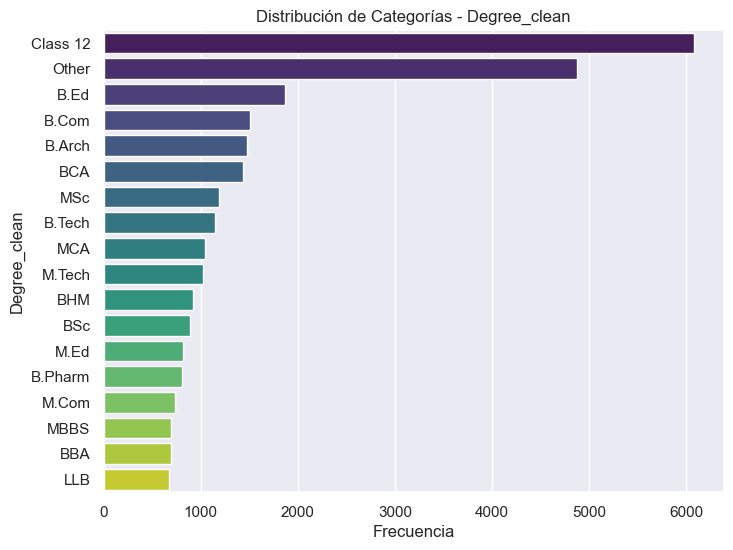

In [27]:
analisis_columna_profundizado(df, 'Degree_clean')

In [28]:
#Eliminamos la columna original que ya no nos sirve
df.drop(columns= 'Degree', inplace = True)

### <div style="border-radius:15px; padding:15px; margin:0; font-size:60%; font-family:Arial, sans-serif; background-color:rgb(230, 184, 34); color:black; overflow:hidden; box-shadow:0 4px 8px rgba(0, 0, 0, 0.3);"><b> 🟡 1.3.7 Suicidal thoughts </b></div>

Análisis profundo para la columna: Have you ever had suicidal thoughts ?
--------------------------------------------------
Tipo de dato: object
Valores nulos: 0 (0.00%)
Cardinalidad: 2 valores únicos

Distribución de valores binarios:
Have you ever had suicidal thoughts ?
Yes    63.261572
No     36.738428
Name: proportion, dtype: float64


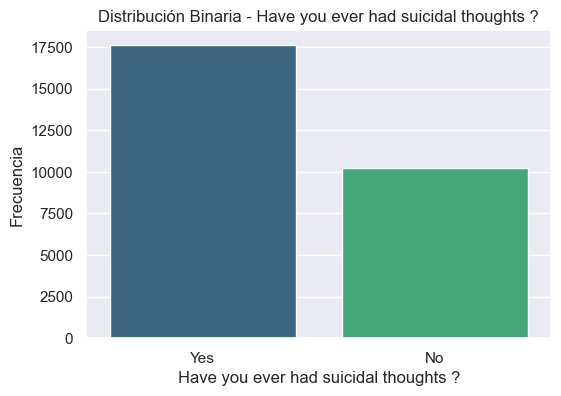

In [29]:
analisis_columna_profundizado(df, 'Have you ever had suicidal thoughts ?')

In [30]:
pd.crosstab(df['Have you ever had suicidal thoughts ?'], df['Depression'], normalize='index') * 100


Depression,0,1
Have you ever had suicidal thoughts ?,,
No,76.814142,23.185858
Yes,20.968748,79.031252


Vamos a dejar esta variable, será muy fuerte como predictora pero no esperamos que en el negocio todos los que quieran usar nuestro modelo vayan a tener esta info. por lo que haremos modelos con y sin esta feature para evaluar el desempeño en cada caso,

### <div style="border-radius:15px; padding:15px; margin:0; font-size:60%; font-family:Arial, sans-serif; background-color:rgb(230, 184, 34); color:black; overflow:hidden; box-shadow:0 4px 8px rgba(0, 0, 0, 0.3);"><b> 🟡 1.3.8 Family mental illness  </b></div>

Análisis profundo para la columna: Family History of Mental Illness
--------------------------------------------------
Tipo de dato: object
Valores nulos: 0 (0.00%)
Cardinalidad: 2 valores únicos

Distribución de valores binarios:
Family History of Mental Illness
No     51.611051
Yes    48.388949
Name: proportion, dtype: float64


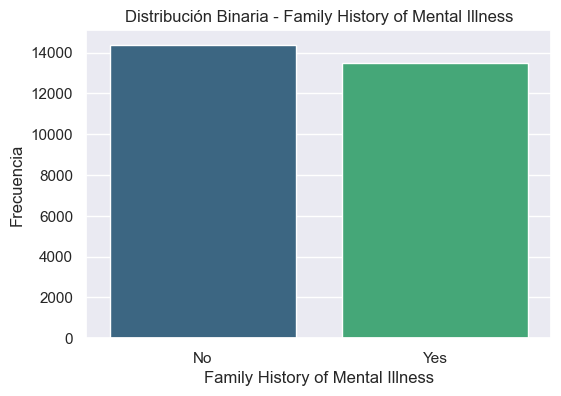

In [31]:
analisis_columna_profundizado(df,'Family History of Mental Illness' )

In [32]:
df.head()

,id,Gender,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,City_clean,Degree_clean
0,2,Male,33.0,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,Yes,3.0,1.0,No,1,Visakhapatnam,B.Pharm
1,8,Female,24.0,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,No,3.0,2.0,Yes,0,Bangalore,BSc
2,26,Male,31.0,3.0,0.0,7.03,5.0,0.0,Less than 5 hours,Healthy,No,9.0,1.0,Yes,0,Srinagar,Other
3,30,Female,28.0,3.0,0.0,5.59,2.0,0.0,7-8 hours,Moderate,Yes,4.0,5.0,Yes,1,Varanasi,BCA
4,32,Female,25.0,4.0,0.0,8.13,3.0,0.0,5-6 hours,Moderate,Yes,1.0,1.0,No,0,Jaipur,M.Tech


Esta variable se queda tal como está.

## <div style="border-radius:15px; padding:15px; margin:0; font-size:70%; font-family:Arial, sans-serif; background-color:#0b835f; overflow:hidden; box-shadow:0 4px 8px rgba(0, 0, 0, 0.3);"><b> 🔶 1.4 Análisis detallado por variables: Numéricas</b></div>

Se realiza el análisis profundo de las columnas numéricas, se explica su tratamiento, pero el caso de valores nulos y outliers se trataran más adelante en el código.

### <div style="border-radius:15px; padding:15px; margin:0; font-size:60%; font-family:Arial, sans-serif; background-color:rgb(230, 184, 34); color:black; overflow:hidden; box-shadow:0 4px 8px rgba(0, 0, 0, 0.3);"><b> 🟡 1.4.1 ID </b></div>

Análisis profundo para la columna: id
--------------------------------------------------
Tipo de dato: int64
Valores nulos: 0 (0.00%)
Cardinalidad: 27870 valores únicos

Estadísticas descriptivas:
count     27870.000000
mean      70439.182634
std       40633.159539
min           2.000000
25%       35055.000000
50%       70654.500000
75%      105813.000000
max      140699.000000
Name: id, dtype: float64
Outliers (por debajo): 0
Outliers (por encima): 0


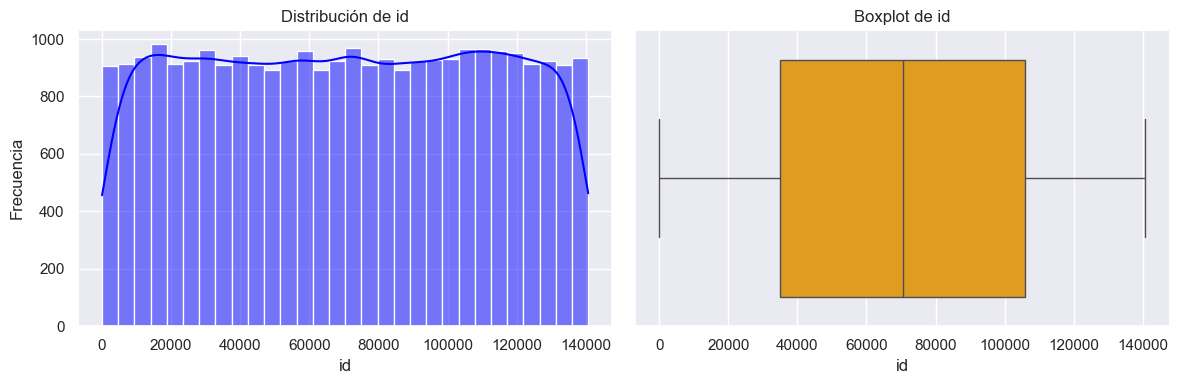

In [33]:
analisis_columna_profundizado(df, 'id')

La variable ´ID´ nos funciona como identificador de registros, al trabajar con un DataFrame de pandas, ya tiene un índice asociado cada registro, por lo que se elimninará esta variable del dataset

In [34]:
df.drop(columns = 'id', inplace = True)

### <div style="border-radius:15px; padding:15px; margin:0; font-size:60%; font-family:Arial, sans-serif; background-color:rgb(230, 184, 34); color:black; overflow:hidden; box-shadow:0 4px 8px rgba(0, 0, 0, 0.3);"><b> 🟡 1.4.2 Age </b></div>

Análisis profundo para la columna: Age
--------------------------------------------------
Tipo de dato: float64
Valores nulos: 0 (0.00%)
Cardinalidad: 34 valores únicos

Estadísticas descriptivas:
count    27870.000000
mean        25.821134
std          4.906574
min         18.000000
25%         21.000000
50%         25.000000
75%         30.000000
max         59.000000
Name: Age, dtype: float64
Outliers (por debajo): 0
Outliers (por encima): 12


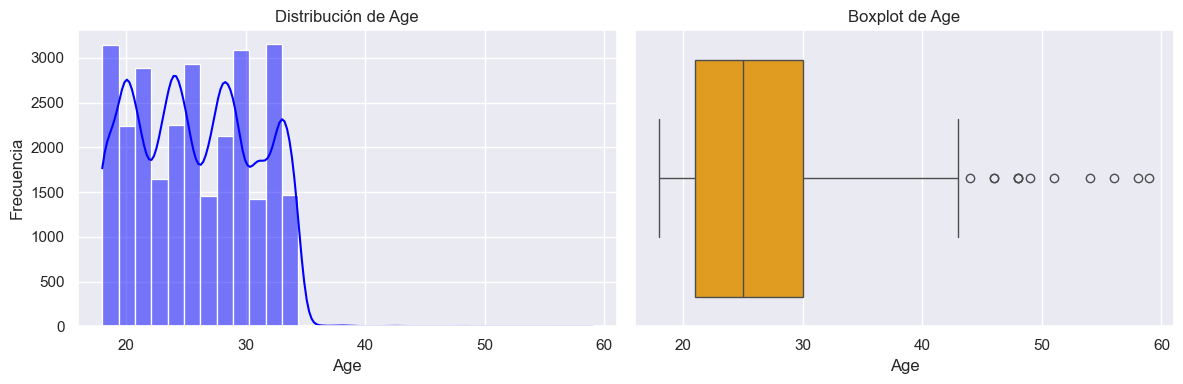

In [35]:
analisis_columna_profundizado(df, 'Age')

La variable ´Age´ presenta una distribución concentrada entre los 18 y 35 años, con una media de aproximadamente 25.8 años. Solo se detectaron 12 outliers por encima del rango típico (superando los 42 años), lo que representa menos del 0.05% de los datos.

Dado que estos valores no distorsionan significativamente la distribución general, se optó por mantenerlos sin alteraciones. En caso de utilizar modelos sensibles a la escala de las variables, se aplicará una técnica de normalización o estandarización para homogeneizar su impacto.

### <div style="border-radius:15px; padding:15px; margin:0; font-size:60%; font-family:Arial, sans-serif; background-color:rgb(230, 184, 34); color:black; overflow:hidden; box-shadow:0 4px 8px rgba(0, 0, 0, 0.3);"><b> 🟡 1.4.3 Academic Pressure </b></div>

Análisis profundo para la columna: Academic Pressure
--------------------------------------------------
Tipo de dato: float64
Valores nulos: 0 (0.00%)
Cardinalidad: 6 valores únicos

Estadísticas descriptivas:
count    27870.000000
mean         3.140617
std          1.381640
min          0.000000
25%          2.000000
50%          3.000000
75%          4.000000
max          5.000000
Name: Academic Pressure, dtype: float64
Outliers (por debajo): 0
Outliers (por encima): 0


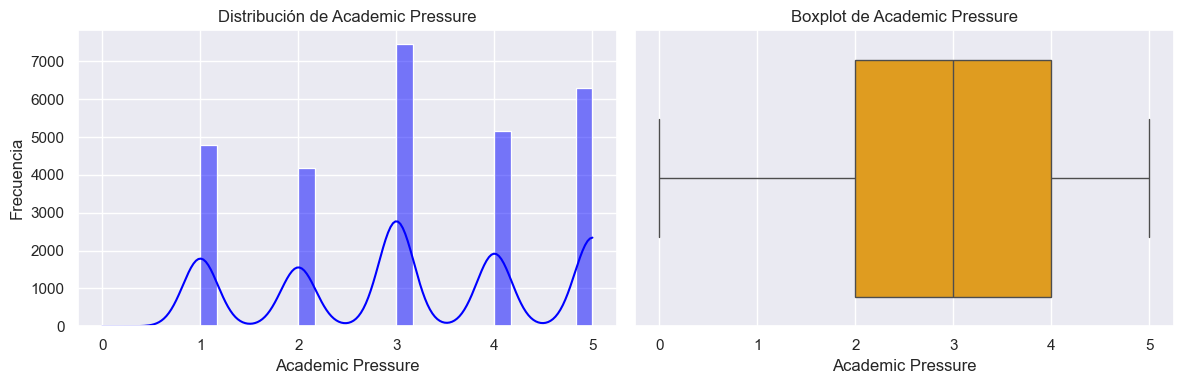

In [36]:
analisis_columna_profundizado(df, 'Academic Pressure')

La variable ´Academic Pressure´ representa una escala ordinal de 0 a 5, donde se evalúa el nivel de presión académica percibida por los estudiantes. La distribución muestra un comportamiento multimodal, con picos en los distintos niveles de presión, siendo el valor más frecuente el 3.

Los estadísticos indican una distribución equilibrada. Por tratarse de una variable ordinal, se conservará su codificación original para mantener el orden inherente a la escala.

### <div style="border-radius:15px; padding:15px; margin:0; font-size:60%; font-family:Arial, sans-serif; background-color:rgb(230, 184, 34); color:black; overflow:hidden; box-shadow:0 4px 8px rgba(0, 0, 0, 0.3);"><b> 🟡 1.4.4 Work Pressure </b></div>

Análisis profundo para la columna: Work Pressure
--------------------------------------------------
Tipo de dato: float64
Valores nulos: 0 (0.00%)
Cardinalidad: 3 valores únicos

Estadísticas descriptivas:
count    27870.000000
mean         0.000431
std          0.044016
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          5.000000
Name: Work Pressure, dtype: float64
Outliers (por debajo): 0
Outliers (por encima): 3


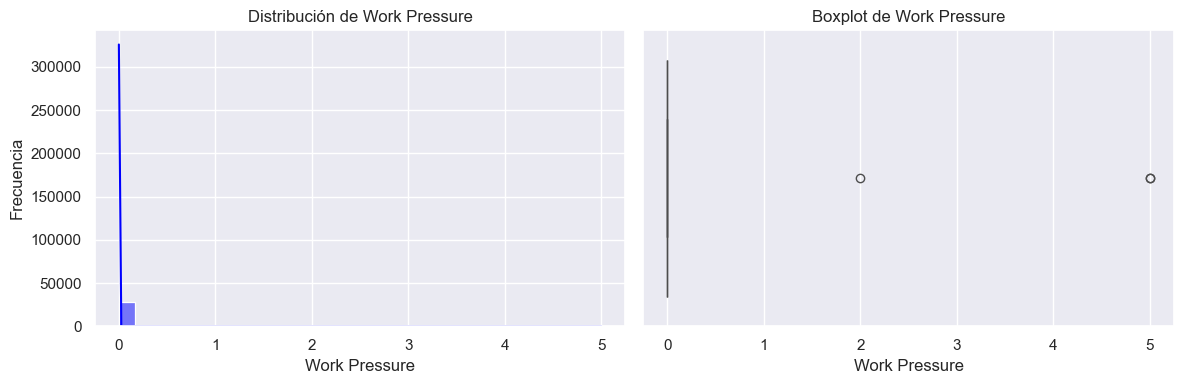

In [37]:
analisis_columna_profundizado(df, 'Work Pressure')

´Work Pressure´ presenta una distribución extremadamente sesgada, con el 99.99% de los registros en valor 0, y solo tres valores distintos (2, 4 y 5) considerados outliers. Esta falta de variabilidad indica que la variable no aporta valor predictivo significativo al modelo. Por esta razón, se decidió excluirla del análisis y modelado posterior para evitar introducir ruido innecesario.

In [38]:
df.drop(columns = 'Work Pressure', inplace = True)

### <div style="border-radius:15px; padding:15px; margin:0; font-size:60%; font-family:Arial, sans-serif; background-color:rgb(230, 184, 34); color:black; overflow:hidden; box-shadow:0 4px 8px rgba(0, 0, 0, 0.3);"><b> 🟡 1.4.5 CGPA </b></div>

Análisis profundo para la columna: CGPA
--------------------------------------------------
Tipo de dato: float64
Valores nulos: 0 (0.00%)
Cardinalidad: 332 valores únicos

Estadísticas descriptivas:
count    27870.000000
mean         7.656028
std          1.470835
min          0.000000
25%          6.290000
50%          7.770000
75%          8.920000
max         10.000000
Name: CGPA, dtype: float64
Outliers (por debajo): 9
Outliers (por encima): 0


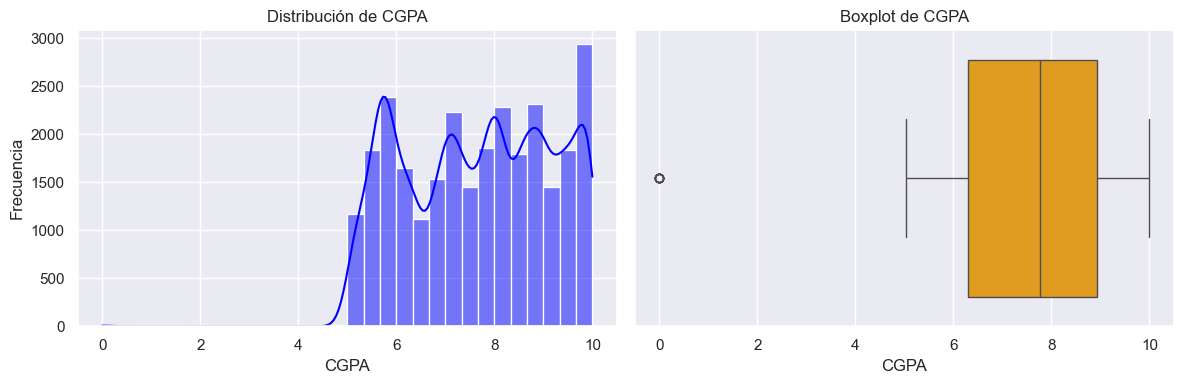

In [39]:
analisis_columna_profundizado(df, 'CGPA')

La variable ´CGPA´ presenta una distribución regular con valores en el rango de 0 a 10. Se identificaron 9 valores atípicos con puntuación 0, los cuales se consideran anómalos, ya que no representan una calificación realista y posiblemente correspondan a errores o valores faltantes. Por ello, se reemplazaran por valores nulos (NaN) para su tratamiento posterior.

El tratamiento posterior será una imputación por la media.


In [40]:
df['CGPA'] = df['CGPA'].replace(0, np.nan)

### <div style="border-radius:15px; padding:15px; margin:0; font-size:60%; font-family:Arial, sans-serif; background-color:rgb(230, 184, 34); color:black; overflow:hidden; box-shadow:0 4px 8px rgba(0, 0, 0, 0.3);"><b> 🟡 1.4.6 Study Satisfaction </b></div>

Análisis profundo para la columna: Study Satisfaction
--------------------------------------------------
Tipo de dato: float64
Valores nulos: 0 (0.00%)
Cardinalidad: 6 valores únicos

Estadísticas descriptivas:
count    27870.000000
mean         2.943559
std          1.361209
min          0.000000
25%          2.000000
50%          3.000000
75%          4.000000
max          5.000000
Name: Study Satisfaction, dtype: float64
Outliers (por debajo): 0
Outliers (por encima): 0


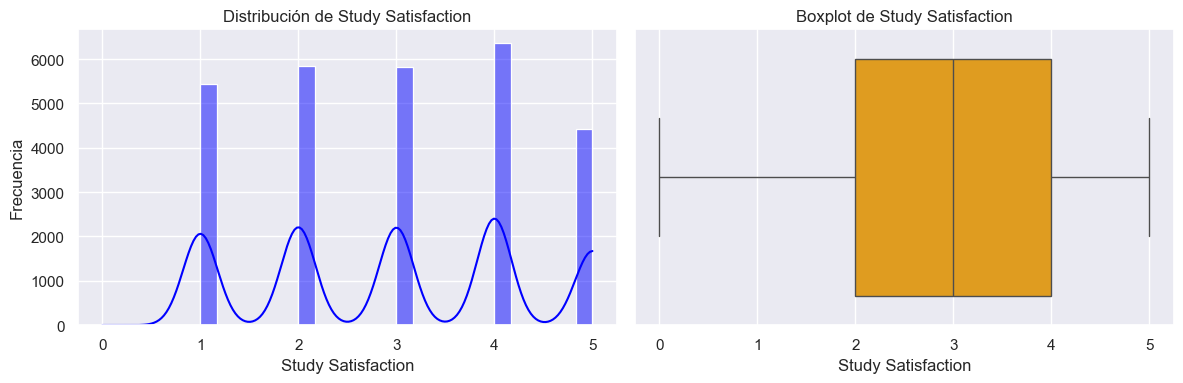

In [41]:
analisis_columna_profundizado(df, 'Study Satisfaction')

In [42]:
df['Study Satisfaction'].value_counts()

Study Satisfaction
4.0    6350
2.0    5835
3.0    5812
1.0    5446
5.0    4417
0.0      10
Name: count, dtype: int64

Esta columna representa un índice ordinal de satisfacción con los estudios, con valores en una escala de 0 a 5.

El valor 0 se presenta solamente 10 veces, y en una escala de satisfacción normalmente solo se aceptan respuestas de 1-5, por lo que será imputado como outlier para su posterior tratamiento, el cual será imputación por la mediana.

In [43]:
df['Study Satisfaction'] = df['Study Satisfaction'].replace(0, np.nan)


### <div style="border-radius:15px; padding:15px; margin:0; font-size:60%; font-family:Arial, sans-serif; background-color:rgb(230, 184, 34); color:black; overflow:hidden; box-shadow:0 4px 8px rgba(0, 0, 0, 0.3);"><b> 🟡 1.4.7 Job Satisfaction </b></div>

Análisis profundo para la columna: Job Satisfaction
--------------------------------------------------
Tipo de dato: float64
Valores nulos: 0 (0.00%)
Cardinalidad: 5 valores únicos

Estadísticas descriptivas:
count    27870.000000
mean         0.000682
std          0.044419
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          4.000000
Name: Job Satisfaction, dtype: float64
Outliers (por debajo): 0
Outliers (por encima): 8


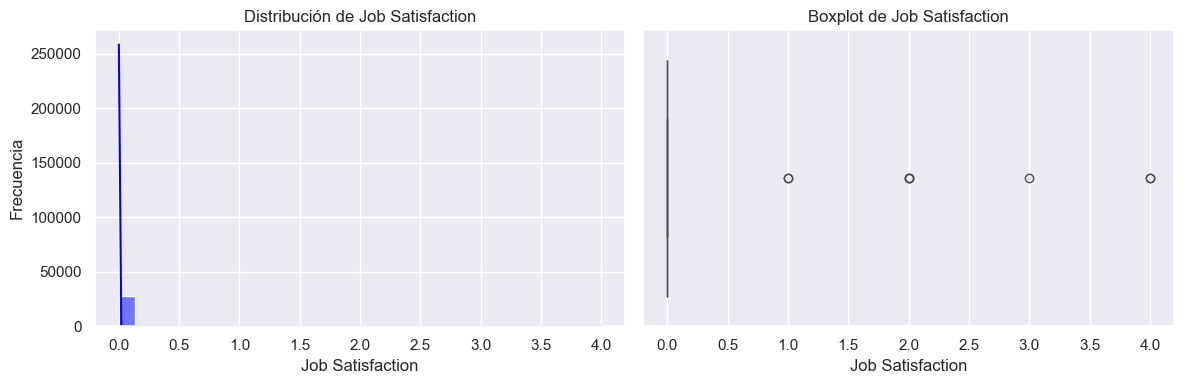

In [44]:
analisis_columna_profundizado(df, 'Job Satisfaction')

En ´Job Satisfaction´ pasa de misma forma que pasó con ´Work Pressure´, pues presenta una distribución extremadamente sesgada, con el 99% de los registros en valor 0, y solo ocho valores distintos (1, 2 3, y 4) considerados outliers. Esta falta de variabilidad indica que la variable no aporta valor predictivo significativo al modelo. Por esta razón, se decidió excluirla del análisis y modelado posterior para evitar introducir ruido innecesario.

In [45]:
df.drop(columns = 'Job Satisfaction', inplace = True)

### <div style="border-radius:15px; padding:15px; margin:0; font-size:60%; font-family:Arial, sans-serif; background-color:rgb(230, 184, 34); color:black; overflow:hidden; box-shadow:0 4px 8px rgba(0, 0, 0, 0.3);"><b> 🟡 1.4.8 Work/Study Hours </b></div>

Análisis profundo para la columna: Work/Study Hours
--------------------------------------------------
Tipo de dato: float64
Valores nulos: 0 (0.00%)
Cardinalidad: 13 valores únicos

Estadísticas descriptivas:
count    27870.000000
mean         7.157948
std          3.707180
min          0.000000
25%          4.000000
50%          8.000000
75%         10.000000
max         12.000000
Name: Work/Study Hours, dtype: float64
Outliers (por debajo): 0
Outliers (por encima): 0


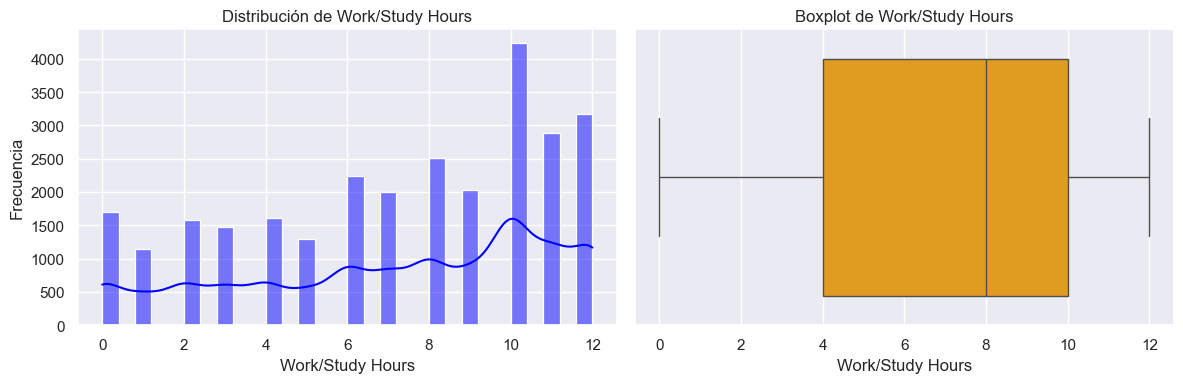

In [46]:
analisis_columna_profundizado(df, 'Work/Study Hours')

Sucede algo interesante en este caso, debido a que existen  más de 1500 registros que establecen 0 como horas de trabajo o estudio. Esto es un error de medida para el caso, debido a que el caso de negocio se aplica unicamente a estudiantes, por consiguiente deben presentar horas de estudio. Por lo tanto, se trataran estos registros como faltantes y se imputarán posteriormente.

In [47]:
df['Work/Study Hours'] = df['Work/Study Hours'].replace(0, np.nan)

### <div style="border-radius:15px; padding:15px; margin:0; font-size:60%; font-family:Arial, sans-serif; background-color:rgb(230, 184, 34); color:black; overflow:hidden; box-shadow:0 4px 8px rgba(0, 0, 0, 0.3);"><b> 🟡 1.4.9 Financial Stress </b></div>

Análisis profundo para la columna: Financial Stress
--------------------------------------------------
Tipo de dato: float64
Valores nulos: 3 (0.01%)
Cardinalidad: 5 valores únicos

Estadísticas descriptivas:
count    27867.000000
mean         3.139520
std          1.437289
min          1.000000
25%          2.000000
50%          3.000000
75%          4.000000
max          5.000000
Name: Financial Stress, dtype: float64
Outliers (por debajo): 0
Outliers (por encima): 0


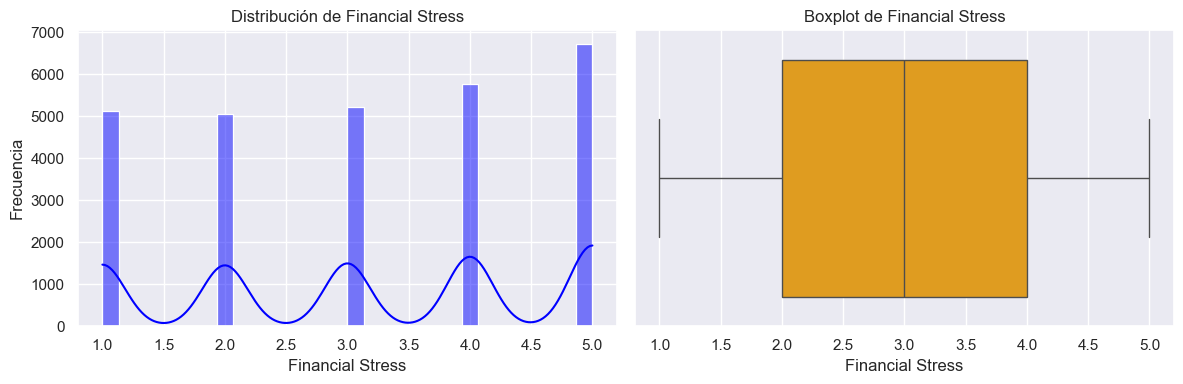

In [48]:
analisis_columna_profundizado(df, 'Financial Stress')

Se detectaron únicamente 3 valores nulos (0.01%), los cuales serán imputados con la mediana para mantener la coherencia de la distribución y preservar la naturaleza ordinal de la variable.

## <div style="border-radius:15px; padding:15px; margin:0; font-size:70%; font-family:Arial, sans-serif; background-color:#0b835f; overflow:hidden; box-shadow:0 4px 8px rgba(0, 0, 0, 0.3);"><b> 🔶 1.5 Análisis detallado de la variable objetivo</b></div>

Análisis profundo para la columna: Depression
--------------------------------------------------
Tipo de dato: int64
Valores nulos: 0 (0.00%)
Cardinalidad: 2 valores únicos

Distribución de valores binarios:
Depression
1    58.514532
0    41.485468
Name: proportion, dtype: float64


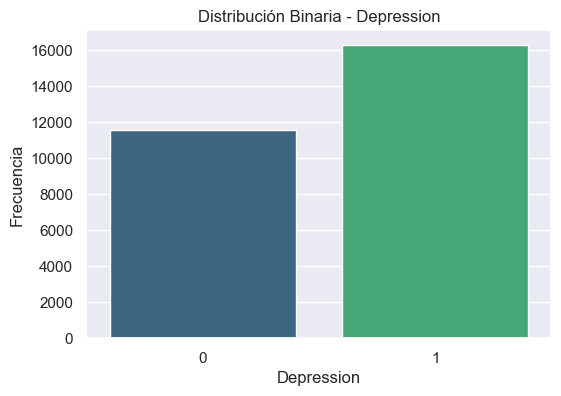

In [49]:
analisis_columna_profundizado(df, 'Depression')

Se tiene una representación adecuada para ambas clases.

## <div style="border-radius:15px; padding:15px; margin:0; font-size:70%; font-family:Arial, sans-serif; background-color:#0b835f; overflow:hidden; box-shadow:0 4px 8px rgba(0, 0, 0, 0.3);"><b> 🔶 1.6. Tratamiento de valores nulos </b></div>

Para la imputación de valores faltantes, se realizará de acuerdo al análisis detallado de cada variable que se realizó en la sección anterior:
* ´Sleep Duration´: Imputación con moda.
* ´Dietary Habits´	Imputación con moda.
* ´CGPA´: Imputación con mediana.
* ´Study Satisfaction´: Imputación con mediana.
* ´Work/Study Hours´: Imputación con KNN.
* ´Financial Stress´: Imputación con mediana.

### <div style="border-radius:15px; padding:15px; margin:0; font-size:60%; font-family:Arial, sans-serif; background-color:rgb(230, 184, 34); color:black; overflow:hidden; box-shadow:0 4px 8px rgba(0, 0, 0, 0.3);"><b> 🟡 1.6.1. Imputación de valores </b></div>

In [50]:
# Imputación con la mediana
mediana_cols = ['CGPA', 'Study Satisfaction', 'Financial Stress']
for col in mediana_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')
    df[col].fillna(df[col].median(), inplace=True)

In [51]:
# Imputación con la moda
df['Dietary Habits'] = df['Dietary Habits'].fillna(df['Dietary Habits'].mode()[0])
df['Sleep Duration'] = df['Sleep Duration'].fillna(df['Sleep Duration'].mode()[0])

Llegamos a la conclusión de que una persona con características similares de edad, presión académica, que le guste lo que estudia y tenga presiones o motivaciones financieras suficientes va a estudiar el mismo tiempo que otra persona con estas características en niveles/proporciones similares. Por el contrario, alguien desinteresado, va a estudiar menos tiempo. Por ello, imputamos esto por KNN, con la teoría de que "los vecinos son similares por el ambiente que tienen". 

In [52]:
# Imputación con KNN
features_for_knn = ['Age', 'Academic Pressure', 'CGPA', 'Study Satisfaction',
                    'Financial Stress', 'Work/Study Hours']

imputer_knn = KNNImputer(n_neighbors=5)

# Hacer una copia auxiliar solo con las columnas necesarias
df_knn = df[features_for_knn].copy()

# Aplicar KNN solo para obtener la columna imputada
df_knn_imputed = imputer_knn.fit_transform(df_knn)

# Sustituir solo la columna 'Work/Study Hours' en el dataframe original
df['Work/Study Hours'] = df_knn_imputed[:, features_for_knn.index('Work/Study Hours')]

df['Work/Study Hours'] = df['Work/Study Hours'].round()


### <div style="border-radius:15px; padding:15px; margin:0; font-size:60%; font-family:Arial, sans-serif; background-color:rgb(230, 184, 34); color:black; overflow:hidden; box-shadow:0 4px 8px rgba(0, 0, 0, 0.3);"><b> 🟡 1.6.2. Verificación de las imputaciones realizadas </b></div>

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27870 entries, 0 to 27900
Data columns (total 14 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Gender                                 27870 non-null  object 
 1   Age                                    27870 non-null  float64
 2   Academic Pressure                      27870 non-null  float64
 3   CGPA                                   27870 non-null  float64
 4   Study Satisfaction                     27870 non-null  float64
 5   Sleep Duration                         27870 non-null  object 
 6   Dietary Habits                         27870 non-null  object 
 7   Have you ever had suicidal thoughts ?  27870 non-null  object 
 8   Work/Study Hours                       27870 non-null  float64
 9   Financial Stress                       27870 non-null  float64
 10  Family History of Mental Illness       27870 non-null  object 
 11  Depress

Análisis profundo para la columna: Sleep Duration
--------------------------------------------------
Tipo de dato: object
Valores nulos: 0 (0.00%)
Cardinalidad: 4 valores únicos

Distribución de categorías:
Sleep Duration
Less than 5 hours    29.856476
7-8 hours            26.325798
5-6 hours            22.163617
More than 8 hours    21.654108
Name: proportion, dtype: float64


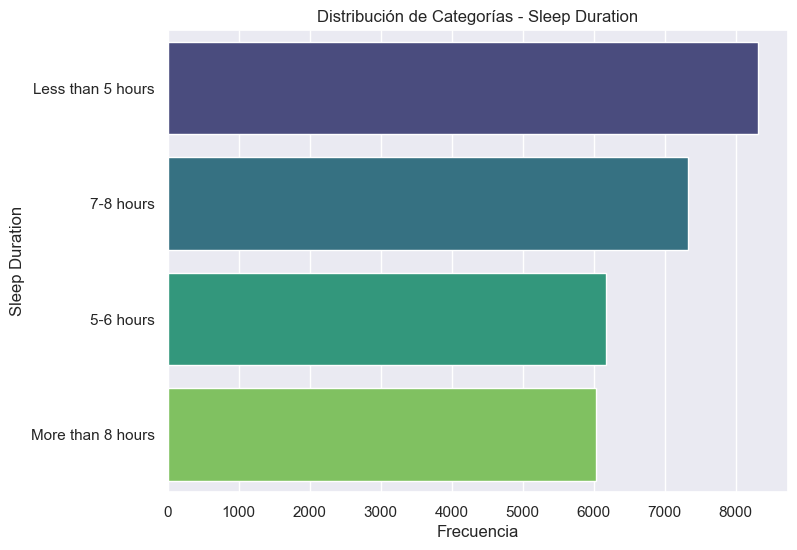

Análisis profundo para la columna: Dietary Habits
--------------------------------------------------
Tipo de dato: object
Valores nulos: 0 (0.00%)
Cardinalidad: 3 valores únicos

Distribución de categorías:
Dietary Habits
Unhealthy    37.032652
Moderate     35.557948
Healthy      27.409401
Name: proportion, dtype: float64


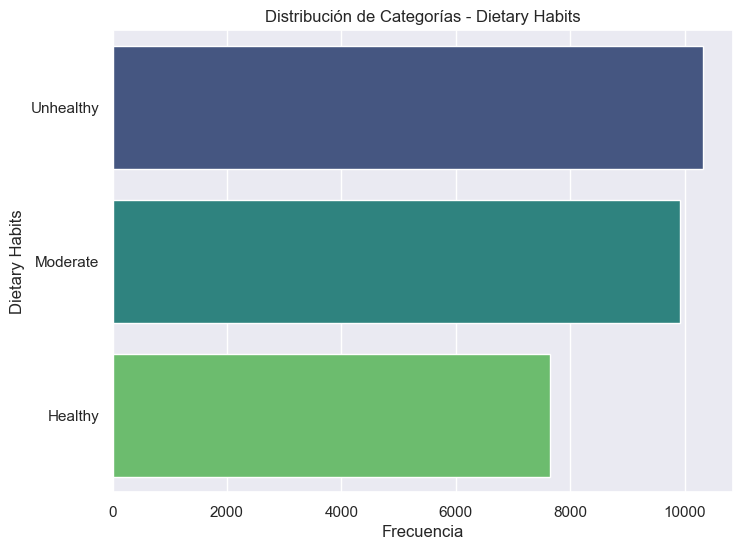

Análisis profundo para la columna: CGPA
--------------------------------------------------
Tipo de dato: float64
Valores nulos: 0 (0.00%)
Cardinalidad: 331 valores únicos

Estadísticas descriptivas:
count    27870.000000
mean         7.658537
std          1.464385
min          5.030000
25%          6.290000
50%          7.770000
75%          8.920000
max         10.000000
Name: CGPA, dtype: float64
Outliers (por debajo): 0
Outliers (por encima): 0


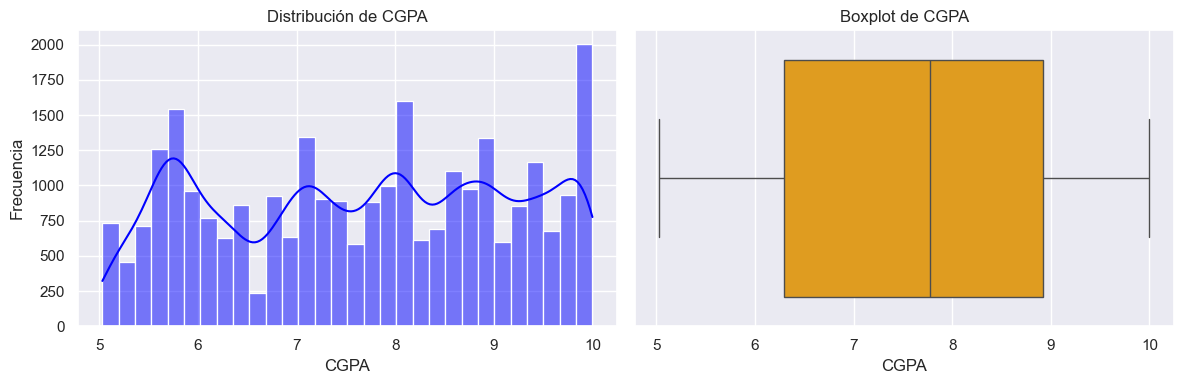

Análisis profundo para la columna: Study Satisfaction
--------------------------------------------------
Tipo de dato: float64
Valores nulos: 0 (0.00%)
Cardinalidad: 5 valores únicos

Estadísticas descriptivas:
count    27870.000000
mean         2.944636
std          1.360067
min          1.000000
25%          2.000000
50%          3.000000
75%          4.000000
max          5.000000
Name: Study Satisfaction, dtype: float64
Outliers (por debajo): 0
Outliers (por encima): 0


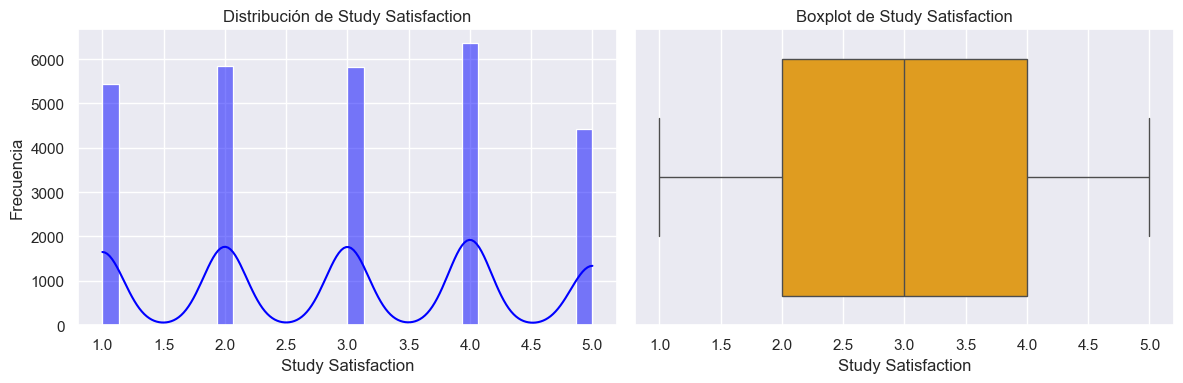

Análisis profundo para la columna: Work/Study Hours
--------------------------------------------------
Tipo de dato: float64
Valores nulos: 0 (0.00%)
Cardinalidad: 12 valores únicos

Estadísticas descriptivas:
count    27870.000000
mean         7.614962
std          3.249574
min          1.000000
25%          5.000000
50%          8.000000
75%         10.000000
max         12.000000
Name: Work/Study Hours, dtype: float64
Outliers (por debajo): 0
Outliers (por encima): 0


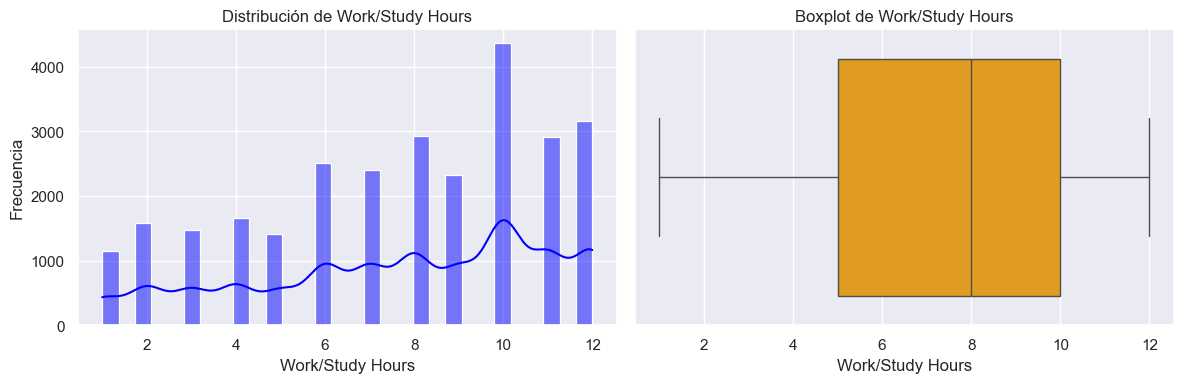

Análisis profundo para la columna: Financial Stress
--------------------------------------------------
Tipo de dato: float64
Valores nulos: 0 (0.00%)
Cardinalidad: 5 valores únicos

Estadísticas descriptivas:
count    27870.000000
mean         3.139505
std          1.437212
min          1.000000
25%          2.000000
50%          3.000000
75%          4.000000
max          5.000000
Name: Financial Stress, dtype: float64
Outliers (por debajo): 0
Outliers (por encima): 0


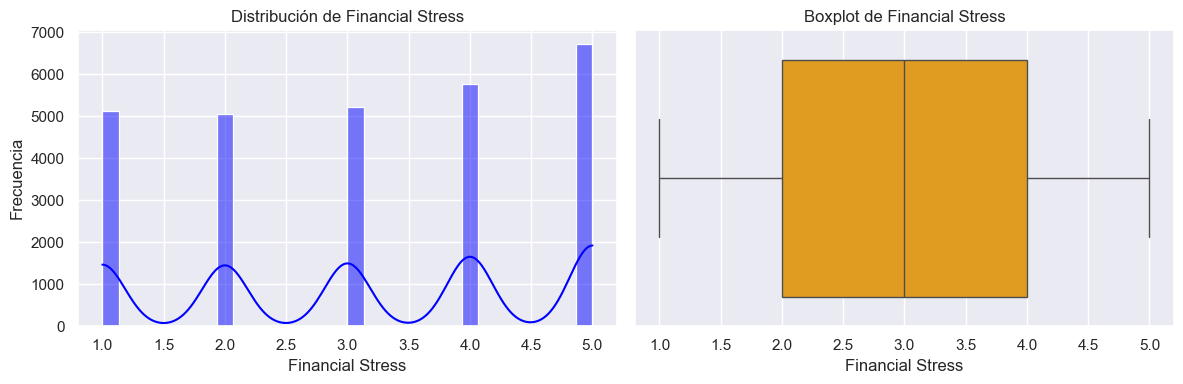

In [54]:
for col in ['Sleep Duration', 'Dietary Habits', 'CGPA', 'Study Satisfaction', 'Work/Study Hours', 'Financial Stress']:
    analisis_columna_profundizado(df, col)

Todas las imputaciones se realizaron correctamente de acuerdo con lo establecido anteriormente y se observa en los análisis de cada variable.

## <div style="border-radius:15px; padding:15px; margin:0; font-size:70%; font-family:Arial, sans-serif; background-color:#0b835f; overflow:hidden; box-shadow:0 4px 8px rgba(0, 0, 0, 0.3);"><b> 🔶 1.7. Guardado del Dataset limpio </b></div>

In [55]:
df

,Gender,Age,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,City_clean,Degree_clean
0,Male,33.0,5.0,8.97,2.0,5-6 hours,Healthy,Yes,3.0,1.0,No,1,Visakhapatnam,B.Pharm
1,Female,24.0,2.0,5.90,5.0,5-6 hours,Moderate,No,3.0,2.0,Yes,0,Bangalore,BSc
2,Male,31.0,3.0,7.03,5.0,Less than 5 hours,Healthy,No,9.0,1.0,Yes,0,Srinagar,Other
3,Female,28.0,3.0,5.59,2.0,7-8 hours,Moderate,Yes,4.0,5.0,Yes,1,Varanasi,BCA
4,Female,25.0,4.0,8.13,3.0,5-6 hours,Moderate,Yes,1.0,1.0,No,0,Jaipur,M.Tech
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27896,Female,27.0,5.0,5.75,5.0,5-6 hours,Unhealthy,Yes,7.0,1.0,Yes,0,Surat,Class 12
27897,Male,27.0,2.0,9.40,3.0,Less than 5 hours,Healthy,No,6.0,3.0,Yes,0,Ludhiana,MSc
27898,Male,31.0,3.0,6.61,4.0,5-6 hours,Unhealthy,No,12.0,2.0,No,0,Other,Other
27899,Female,18.0,5.0,6.88,2.0,Less than 5 hours,Healthy,Yes,10.0,5.0,No,1,Ludhiana,Class 12


In [56]:
df.to_csv('./StudentDepressionDataset_V1.csv', index=False)

# <div style="border-radius:15px; padding:15px; margin:0; font-size:100%; font-family:Arial, sans-serif; background-color:#0074ff; overflow:hidden; box-shadow:0 4px 8px rgba(0, 0, 0, 0.3);"><b> 2. 📊 Entrenamiento de modelos </b></div>

<div style="border: 2px solid #0074ff; padding: 15px; border-radius: 10px;">
<p style="font-size: 20px; font-weight: bold; color: #0074ff;">Modelos para la Predicción de la Variable Objetivo</p> 
<p style="font-size: 18px; font-weight: bold; color: #0074ff;">Modelos clásicos de Machine Learning:</p> 
    <ul style="font-size: 16px; line-height: 1.5"> 
    <li><strong>Árboles de decisión</strong>: modelo basado en reglas, puede sobreajustarse.</li> 
    <li><strong>Random Forest</strong>: conjunto de árboles que mejora la generalización.</li>
    <li><strong>Gradient Boosting (XGBoost, LightGBM, CatBoost)</strong>: entrenamiento secuencial, muy eficaz para datos tabulares.</li> 
    <li><strong>Máquinas de Vectores de Soporte (SVM)</strong>: útil en espacios de alta dimensión.</li>
    <li><strong>k-Nearest Neighbors (k-NN)</strong>: clasifica según vecinos cercanos, sensible a escalado y grandes volúmenes.</li>
    <li><strong>Regresión logística</strong>: ideal para clasificación binaria, fácil de interpretar.</li>
    </ul> 
<p style="font-size: 18px; font-weight: bold; color: #0074ff;">Modelos basados en Redes Neuronales:</p> 
    <ul style="font-size: 16px; line-height: 1.5"> 
    <li><strong>Perceptrón Multicapa (MLP)</strong>: útil para relaciones no lineales complejas.</li> 
    <li><strong>RNN, LSTM y GRU</strong>: óptimos para secuencias o series temporales.</li> 
    <li><strong>Transformers</strong>: muy potentes para texto o secuencias complejas.</li> 
    </ul>
<p style="font-size: 18px; font-weight: bold; color: #0074ff;">Modelos probabilísticos y estadísticos:</p> 
    <ul style="font-size: 16px; line-height: 1.5"> 
    <li><strong>Naive Bayes</strong>: basado en probabilidades condicionales, muy eficiente con texto.</li>
    <li><strong>Regresión lineal</strong>: útil si la variable objetivo es continua.</li>
    <li><strong>Análisis Discriminante Lineal (LDA)</strong>: mezcla reducción de dimensionalidad y clasificación.</li> 
    </ul> 
<p style="font-size: 18px; font-weight: bold; color: #0074ff;">Técnicas de ensamble e híbridos:</p> 
    <ul style="font-size: 16px; line-height: 1.5"> 
    <li><strong>Stacking / Blending</strong>: combina varios modelos base con un modelo meta.</li> 
    <li><strong>Bagging / Boosting</strong>: mejora estabilidad y precisión del modelo.</li>
    </ul> 
 </div>

In [72]:
df = pd.read_csv('./StudentDepressionDataset_V1.csv')
print(df.isnull().sum())

Gender                                   0
Age                                      0
Academic Pressure                        0
CGPA                                     0
Study Satisfaction                       0
Sleep Duration                           0
Dietary Habits                           0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         0
Family History of Mental Illness         0
Depression                               0
City_clean                               0
Degree_clean                             0
dtype: int64


## <div style="border-radius:15px; padding:15px; margin:0; font-size:70%; font-family:Arial, sans-serif; background-color:rgb(140, 70, 232); overflow:hidden; box-shadow:0 4px 8px rgba(0, 0, 0, 0.3);"><b> 🔶 2.0 ENTRENAMIENTO GENERAL PRELIMINAR</b></div>

In [73]:
# ===================== DIVISIÓN EN ENTRENAMIENTO Y PRUEBA =====================
X = df.drop(columns=['Depression'])
y = df['Depression']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

label_encoders = {}
scalers = {}

categorical = [var for var in df.columns if df[var].dtype == 'object']
for columna in categorical:
    le = LabelEncoder()
    X_train[columna] = le.fit_transform(X_train[columna].astype(str)) #aquí sí se hace fittransform
    X_test[columna] = le.transform(X_test[columna].astype(str)) #solamente se hace transform
    label_encoders[columna] = le

numerical = [var for var in X.columns if df[var].dtype in ['int64', 'float64']]
for columna in numerical:
    scaler = MinMaxScaler()
    X_train[columna] = scaler.fit_transform(X_train[[columna]])
    X_test[columna] = scaler.transform(X_test[[columna]])
    scalers[columna] = scaler


# ===================== DEFINICIÓN DE MODELOS =====================
modelos = {
    'Árbol de decisión': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    'SVM': SVC(probability=True, random_state=42),
    'k-NN': KNeighborsClassifier(),
    'Regresión logística': LogisticRegression(max_iter=1000, random_state=42)
}

# ===================== ENTRENAMIENTO Y EVALUACIÓN =====================
reportes = {}
matrices_confusion = {}

for nombre, modelo in modelos.items():
    print('ENTRENANDO--- ', modelo)
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)
    reportes[nombre] = classification_report(y_test, y_pred, output_dict=True)
    matrices_confusion[nombre] = confusion_matrix(y_test, y_pred)



ENTRENANDO---  DecisionTreeClassifier(random_state=42)
ENTRENANDO---  RandomForestClassifier(random_state=42)
ENTRENANDO---  XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)
ENTRENANDO---  SVC(probability=True, random_state=42)
ENTRENANDO---  KNeighborsClassifier()
ENTRENANDO---  Logisti

### <div style="border-radius:15px; padding:15px; margin:0; font-size:60%; font-family:Arial, sans-serif; background-color:rgb(230, 184, 34); color:black; overflow:hidden; box-shadow:0 4px 8px rgba(0, 0, 0, 0.3);"><b> 🟡 2.0.1 Matrices de confusión </b></div>

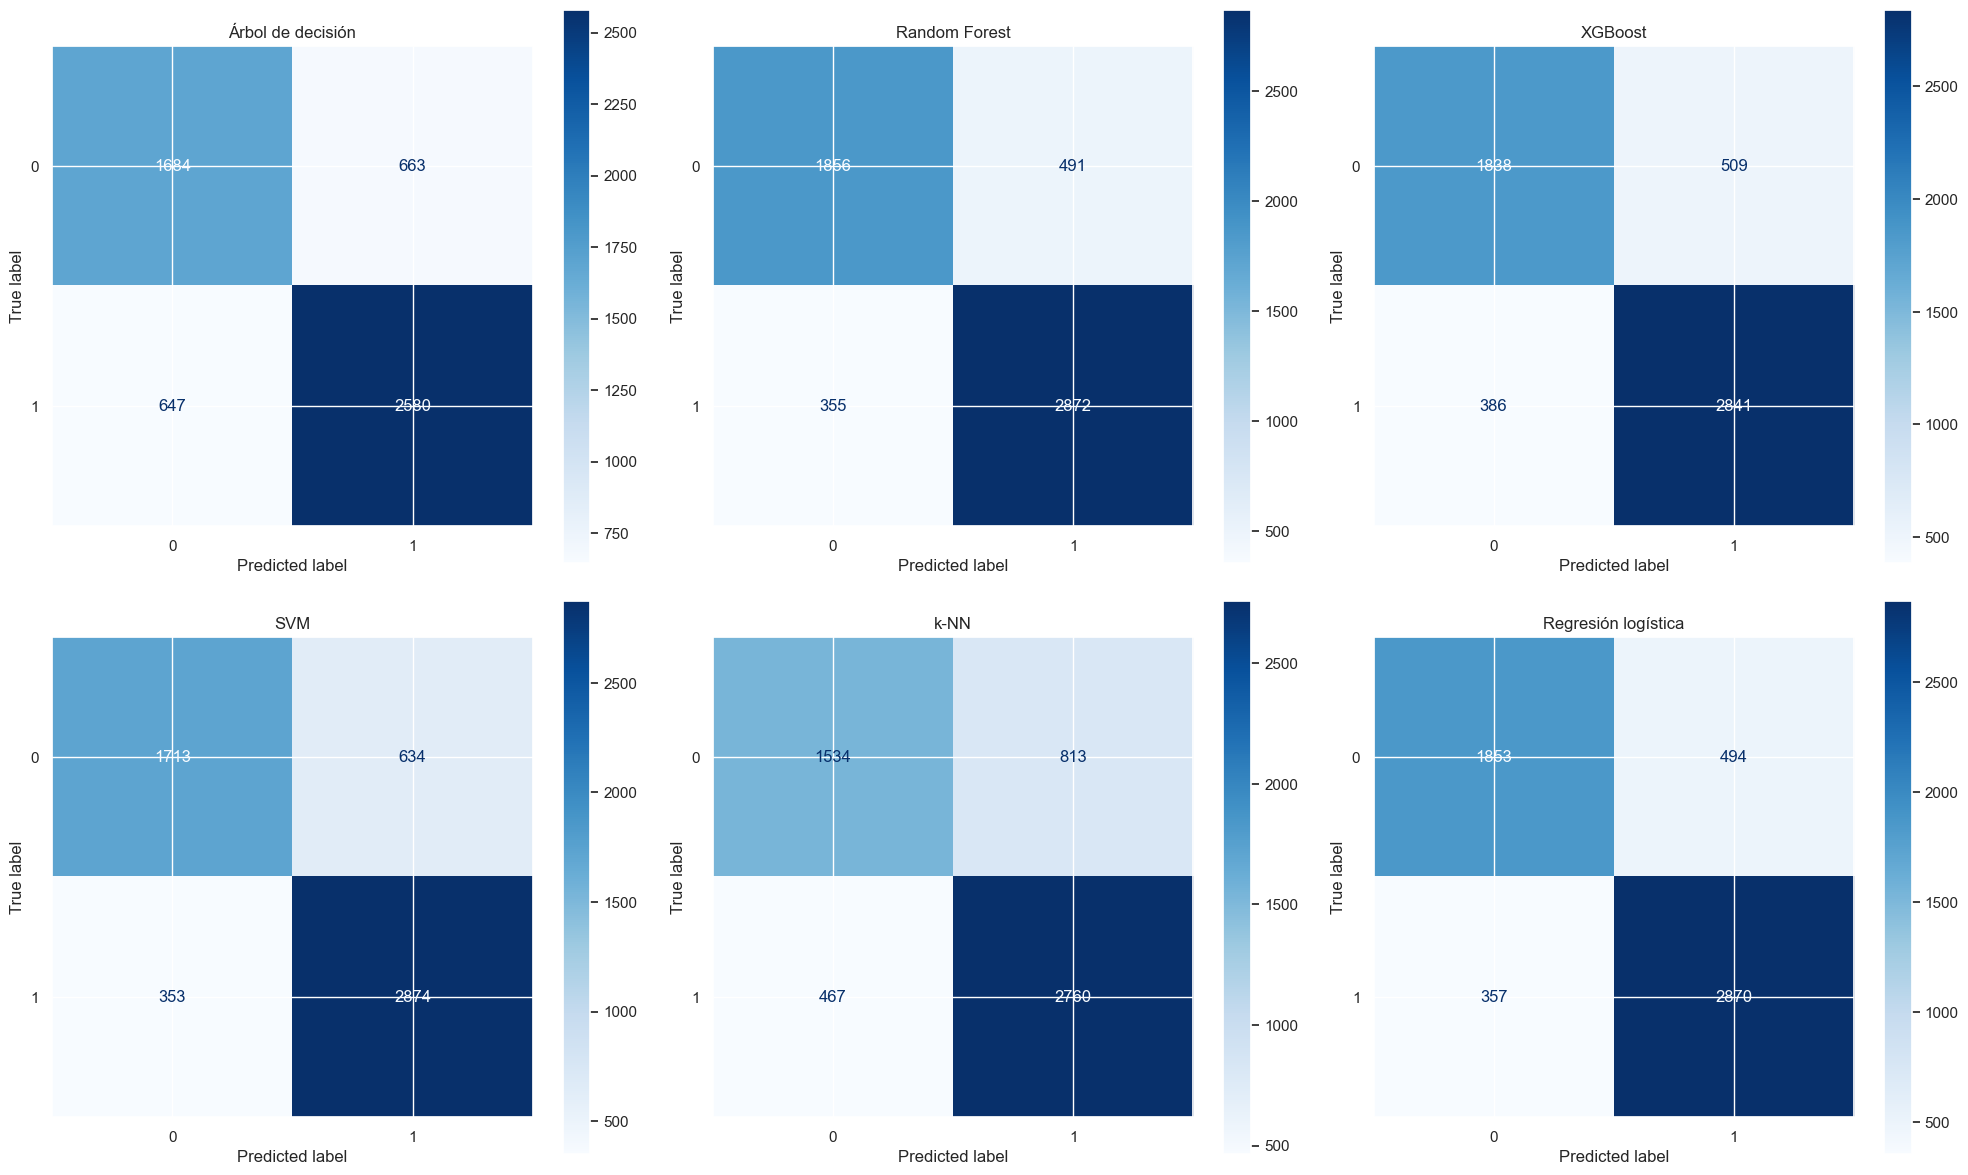

In [74]:
# ===================== GRÁFICO: MATRICES DE CONFUSIÓN 2x3 =====================
fig, axes = plt.subplots(2, 3, figsize=(20, 12))
axes = axes.ravel()

for i, (nombre, matriz) in enumerate(matrices_confusion.items()):
    disp = ConfusionMatrixDisplay(confusion_matrix=matriz)
    disp.plot(ax=axes[i], cmap='Blues', values_format='d')
    axes[i].set_title(nombre)

plt.tight_layout()
plt.show()


### <div style="border-radius:15px; padding:15px; margin:0; font-size:60%; font-family:Arial, sans-serif; background-color:rgb(230, 184, 34); color:black; overflow:hidden; box-shadow:0 4px 8px rgba(0, 0, 0, 0.3);"><b> 🟡 2.0.2 Métricas de modelos preliminares </b></div>

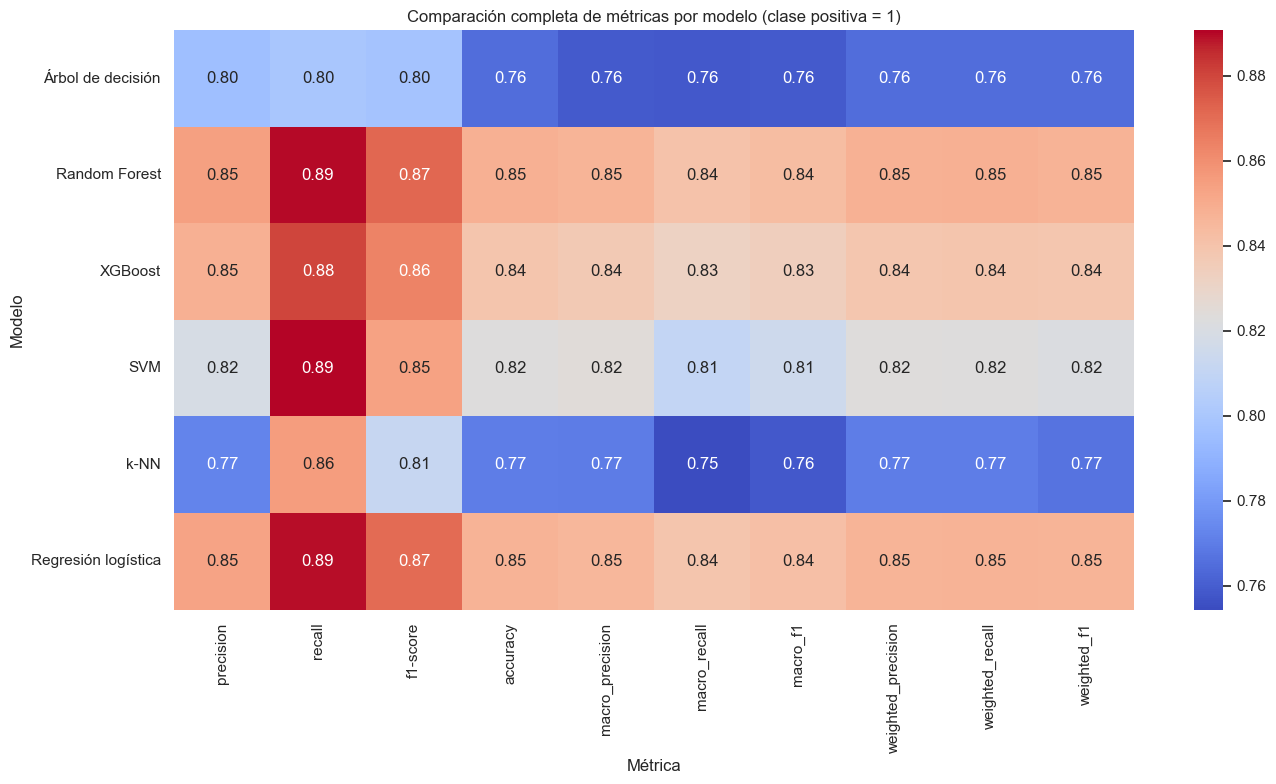

In [75]:
# ===================== MAPA DE CALOR DE MÉTRICAS =====================
# Identificar la clase positiva automáticamente
clase_positiva = list(reportes[list(reportes.keys())[0]].keys())
clase_positiva = [c for c in clase_positiva if c not in ['accuracy', 'macro avg', 'weighted avg']][1]  # segunda clase

# Extraer múltiples métricas
metricas_avanzadas = {}
for nombre in modelos:
    rep = reportes[nombre]
    metricas_avanzadas[nombre] = {
        'precision': rep[clase_positiva]['precision'],
        'recall': rep[clase_positiva]['recall'],
        'f1-score': rep[clase_positiva]['f1-score'],
        'accuracy': rep['accuracy'],
        'macro_precision': rep['macro avg']['precision'],
        'macro_recall': rep['macro avg']['recall'],
        'macro_f1': rep['macro avg']['f1-score'],
        'weighted_precision': rep['weighted avg']['precision'],
        'weighted_recall': rep['weighted avg']['recall'],
        'weighted_f1': rep['weighted avg']['f1-score'],
    }

# Crear DataFrame y mapa de calor
df_metricas = pd.DataFrame(metricas_avanzadas).T

plt.figure(figsize=(14, 8))
sns.heatmap(df_metricas, annot=True, fmt=".2f", cmap="coolwarm")
plt.title(f"Comparación completa de métricas por modelo (clase positiva = {clase_positiva})")
plt.ylabel("Modelo")
plt.xlabel("Métrica")
plt.tight_layout()
plt.show()

Por el tipo de problema, sabemos que el costo de un falso negativo es alto, es decir, concluir que una persona que sí tiene depresión como si no tuviera depresión, este costo puede ser hasta el suicidio en casos extremos; por lo tanto, decidimos priorizar la métrica de sensibilidad (como es común en ámbitos médicos), asimismo, para tener un balance, vamos a enfocarnos también en el F1-score. Con base en ello, procedemos al entrenamiento detallado de modelos ganadores en esta fase. 

Vamos a usar el weighted F1 porque da un balance en caso de un dataset desbalanceado. No es el caso actualmente, pero en la práctica suelen ser menos las personas con depresión por lo que se puede desbalancear el dataset al ponerlo en producción.

### <div style="border-radius:15px; padding:15px; margin:0; font-size:60%; font-family:Arial, sans-serif; background-color:rgb(230, 184, 34); color:black; overflow:hidden; box-shadow:0 4px 8px rgba(0, 0, 0, 0.3);"><b> 🟡 2.0.3 Modelos preliminares ganadores </b></div>

Los tres modelos seleccionados —**Random Forest**, **Regresión Logística** y **XGBoost**— destacan por ofrecer un excelente balance entre **recall** y **weighted F1-score**, métricas clave en problemas médicos donde es crucial minimizar los falsos negativos sin comprometer el rendimiento general. Random Forest y Regresión Logística lideran con un recall de 0.89 y un weighted F1 de 0.85, combinando alta sensibilidad con consistencia en la clasificación. XGBoost, aunque ligeramente por detrás, mantiene un rendimiento competitivo (recall 0.88, weighted F1 0.84) y se posiciona como una opción poderosa gracias a su capacidad para capturar relaciones complejas en los datos.

## <div style="border-radius:15px; padding:15px; margin:0; font-size:70%; font-family:Arial, sans-serif; background-color:#0b835f; overflow:hidden; box-shadow:0 4px 8px rgba(0, 0, 0, 0.3);"><b> 🔶 2.1. Random Forest </b></div>

In [76]:
param_grid = {
    'n_estimators': [300, 400, 500],              # número de árboles
    'max_depth': [None, 10,11,13 ],              # profundidad del árbol
    'min_samples_split': [2, 5,],              # mínimo de muestras para dividir
    'min_samples_leaf': [1, 2,]                 # mínimo de muestras por hoja
}


Inicialmente se usó: 
param_grid = {
    'n_estimators': [100,200,300],              # número de árboles
    'max_depth': [None, 10,20,30],              # profundidad del árbol
    'min_samples_split': [2, 5, 10],              # mínimo de muestras para dividir
    'min_samples_leaf': [1, 2, 4]                 # mínimo de muestras por hoja
}

Con los resultados de espe grid, notamos que 300 estimadores era lo mejor y aumentar profundidad noayudaba, por lo que le dimos más granularidad a la profundidad pero no aumentando demasiado.

In [77]:
from sklearn.model_selection import GridSearchCV

rf = RandomForestClassifier(random_state=42)

grid_rf = GridSearchCV(
    rf,                      # Modelo de Random Forest a optimizar
    param_grid,              # Conjunto de hiperparámetros a probar
    scoring='f1_weighted',   # Métrica de evaluación: F1 ponderado
    cv=5,                    # Validación cruzada con 5 particiones
    n_jobs=-1,               # Usar todos los núcleos disponibles para paralelizar
    verbose=2                # Nivel de verbosidad para mostrar el progreso
)

grid_rf.fit(X_train, y_train)

print("Mejores hiperparámetros:", grid_rf.best_params_)
print("Mejor F1 ponderado en CV:", grid_rf.best_score_)


Fitting 5 folds for each of 48 candidates, totalling 240 fits
Mejores hiperparámetros: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 300}
Mejor F1 ponderado en CV: 0.8422783909030793


Como grid_rf ya tiene el mejor modelo guardado, procedemos a usar ese para generar predicciones y ver si mejoramos con respecto a nuestro baseline

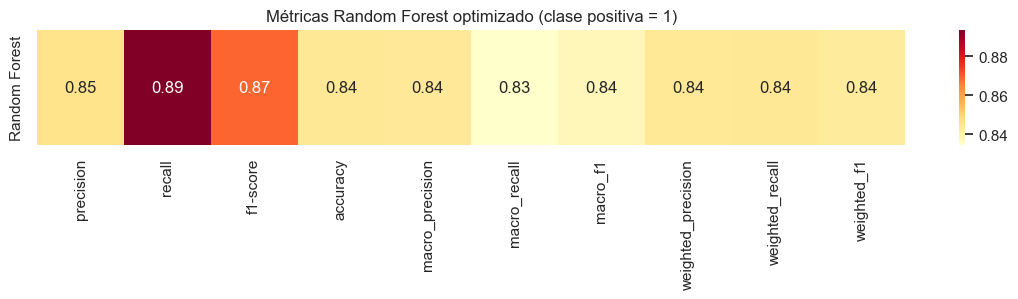

In [78]:
# Predicción
y_pred = grid_rf.predict(X_test)

# Reporte
rep = classification_report(y_test, y_pred, output_dict=True)

# Definir clase positiva
clase_positiva = '1' if '1' in rep else list(rep.keys())[0]

# Extraer métricas en diccionario plano
metricas_rf = {
    'precision': rep[clase_positiva]['precision'],
    'recall': rep[clase_positiva]['recall'],
    'f1-score': rep[clase_positiva]['f1-score'],
    'accuracy': rep['accuracy'],
    'macro_precision': rep['macro avg']['precision'],
    'macro_recall': rep['macro avg']['recall'],
    'macro_f1': rep['macro avg']['f1-score'],
    'weighted_precision': rep['weighted avg']['precision'],
    'weighted_recall': rep['weighted avg']['recall'],
    'weighted_f1': rep['weighted avg']['f1-score'],
}

# Convertir a lista de valores para el heatmap
valores = list(metricas_rf.values())
metricas = list(metricas_rf.keys())

# Crear heatmap simple
plt.figure(figsize=(14, 1.5))
sns.heatmap([valores], annot=True, fmt=".2f", cmap="YlOrRd", xticklabels=metricas, yticklabels=["Random Forest"])
plt.title(f"Métricas Random Forest optimizado (clase positiva = {clase_positiva})")
plt.tight_layout()
plt.show()



Mejoramos únicamente un 2% en el f1-score respecto al modelo inicial.

## <div style="border-radius:15px; padding:15px; margin:0; font-size:70%; font-family:Arial, sans-serif; background-color:#0b835f; overflow:hidden; box-shadow:0 4px 8px rgba(0, 0, 0, 0.3);"><b> 🔶 2.2. Regresión logística </b></div>

In [79]:


logreg = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)

param_grid_lr = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga', 'lbfgs'],
    'penalty': ['l1', 'l2']
}

grid_lr = GridSearchCV(
    logreg,
    param_grid=param_grid_lr,
    scoring='f1_weighted',
    cv=10,
    n_jobs=-1,
    verbose=2
)

grid_lr.fit(X_train, y_train)


Fitting 10 folds for each of 36 candidates, totalling 360 fits


GridSearchCV(cv=10,
             estimator=LogisticRegression(class_weight='balanced',
                                          max_iter=1000, random_state=42),
             n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga', 'lbfgs']},
             scoring='f1_weighted', verbose=2)

In [80]:
print("Mejores hiperparámetros:", grid_lr.best_params_)
print("Mejor F1 ponderado en CV:", grid_lr.best_score_)

Mejores hiperparámetros: {'C': 100, 'penalty': 'l1', 'solver': 'liblinear'}
Mejor F1 ponderado en CV: 0.8422575537464791


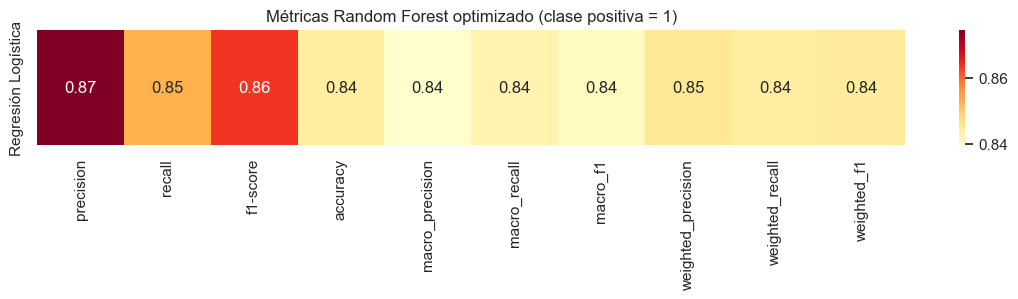

In [81]:
# Predicción
y_pred = grid_lr.predict(X_test)

# Reporte
rep = classification_report(y_test, y_pred, output_dict=True)

# Definir clase positiva
clase_positiva = '1' if '1' in rep else list(rep.keys())[0]

# Extraer métricas en diccionario plano
metricas_rf = {
    'precision': rep[clase_positiva]['precision'],
    'recall': rep[clase_positiva]['recall'],
    'f1-score': rep[clase_positiva]['f1-score'],
    'accuracy': rep['accuracy'],
    'macro_precision': rep['macro avg']['precision'],
    'macro_recall': rep['macro avg']['recall'],
    'macro_f1': rep['macro avg']['f1-score'],
    'weighted_precision': rep['weighted avg']['precision'],
    'weighted_recall': rep['weighted avg']['recall'],
    'weighted_f1': rep['weighted avg']['f1-score'],
}

# Convertir a lista de valores para el heatmap
valores = list(metricas_rf.values())
metricas = list(metricas_rf.keys())

# Crear heatmap simple
plt.figure(figsize=(14, 1.5))
sns.heatmap([valores], annot=True, fmt=".2f", cmap="YlOrRd", xticklabels=metricas, yticklabels=["Regresión Logística"])
plt.title(f"Métricas Random Forest optimizado (clase positiva = {clase_positiva})")
plt.tight_layout()
plt.show()

## <div style="border-radius:15px; padding:15px; margin:0; font-size:70%; font-family:Arial, sans-serif; background-color:#0b835f; overflow:hidden; box-shadow:0 4px 8px rgba(0, 0, 0, 0.3);"><b> 🔶 2.3. XGBoost</b></div>

Vamos a ir con un entrenamiento exhaustivo del XGBoost. 

| Parámetro           | Qué controla                                         | Efecto práctico                                                                 |
|---------------------|------------------------------------------------------|----------------------------------------------------------------------------------|
| `n_estimators`      | Número de árboles a construir                        | Más árboles pueden mejorar el rendimiento, pero aumentan el tiempo y riesgo de overfitting. |
| `max_depth`         | Profundidad máxima de los árboles                    | Árboles más profundos capturan más patrones, pero pueden sobreajustarse.       |
| `learning_rate`     | Tasa de aprendizaje (η)                              | Valores bajos hacen el modelo más lento pero más preciso.                      |
| `subsample`         | Porcentaje de muestras utilizadas por árbol          | Introduce aleatoriedad → reduce el overfitting cuando es < 1.0.                |
| `colsample_bytree`  | Porcentaje de características utilizadas por árbol   | Ayuda a prevenir overfitting al usar solo una parte de los features en cada árbol. |
| `min_child_weight`  | Mínima suma de pesos en un nodo para dividir         | Valores altos hacen el modelo más conservador (menos divisiones).             |
| `gamma`             | Ganancia mínima para realizar un split               | Ayuda a controlar la complejidad. A mayor valor, más conservador el modelo. (menos overfitting)   |


In [82]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

xgb = XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

param_grid_xgb = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.3],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'min_child_weight': [1, 5, 10],
    'gamma': [0, 0.1, 0.3]
}

grid_xgb = GridSearchCV(
    xgb,
    param_grid=param_grid_xgb,
    scoring='f1_weighted',  
    cv=5,
    n_jobs=-1,
    verbose=2
)

grid_xgb.fit(X_train, y_train)

print("Mejores hiperparámetros:", grid_xgb.best_params_)
print("Mejor F1 ponderado en CV:", grid_xgb.best_score_)


Fitting 5 folds for each of 972 candidates, totalling 4860 fits
Mejores hiperparámetros: {'colsample_bytree': 0.8, 'gamma': 0.3, 'learning_rate': 0.3, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 100, 'subsample': 1.0}
Mejor F1 ponderado en CV: 0.8472864537537615


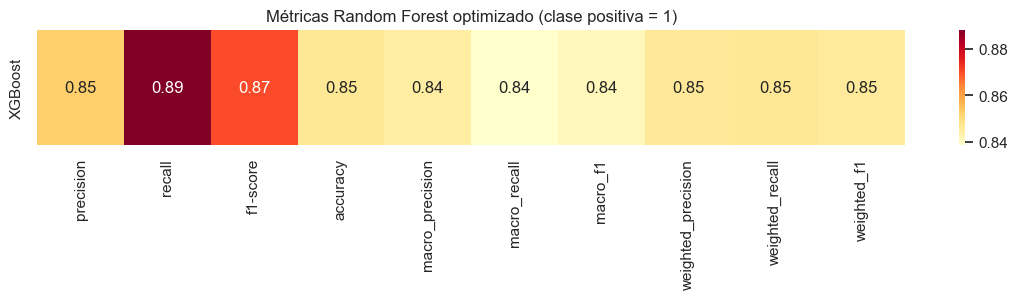

In [83]:
# Predicción
y_pred = grid_xgb.predict(X_test)

# Reporte
rep = classification_report(y_test, y_pred, output_dict=True)

# Definir clase positiva
clase_positiva = '1' if '1' in rep else list(rep.keys())[0]

# Extraer métricas en diccionario plano
metricas_rf = {
    'precision': rep[clase_positiva]['precision'],
    'recall': rep[clase_positiva]['recall'],
    'f1-score': rep[clase_positiva]['f1-score'],
    'accuracy': rep['accuracy'],
    'macro_precision': rep['macro avg']['precision'],
    'macro_recall': rep['macro avg']['recall'],
    'macro_f1': rep['macro avg']['f1-score'],
    'weighted_precision': rep['weighted avg']['precision'],
    'weighted_recall': rep['weighted avg']['recall'],
    'weighted_f1': rep['weighted avg']['f1-score'],
}

# Convertir a lista de valores para el heatmap
valores = list(metricas_rf.values())
metricas = list(metricas_rf.keys())

# Crear heatmap simple
plt.figure(figsize=(14, 1.5))
sns.heatmap([valores], annot=True, fmt=".2f", cmap="YlOrRd", xticklabels=metricas, yticklabels=["XGBoost"])
plt.title(f"Métricas Random Forest optimizado (clase positiva = {clase_positiva})")
plt.tight_layout()
plt.show()

# <div style="border-radius:15px; padding:15px; margin:0; font-size:100%; font-family:Arial, sans-serif; background-color:#0074ff; overflow:hidden; box-shadow:0 4px 8px rgba(0, 0, 0, 0.3);"><b> 3. 📊 Resultados y Visualización </b></div>

## <div style="border-radius:15px; padding:15px; margin:0; font-size:70%; font-family:Arial, sans-serif; background-color:#0b835f; overflow:hidden; box-shadow:0 4px 8px rgba(0, 0, 0, 0.3);"><b> 🔶 3.1 Comparación de métricas base vs optimizadas </b></div>

### <div style="border-radius:15px; padding:15px; margin:0; font-size:60%; font-family:Arial, sans-serif; background-color:rgb(230, 184, 34); color:black; overflow:hidden; box-shadow:0 4px 8px rgba(0, 0, 0, 0.3);"><b> 🟡 3.1.1 F1_weighted </b></div>

In [97]:
df_metricas

,precision,recall,f1-score,accuracy,macro_precision,macro_recall,macro_f1,weighted_precision,weighted_recall,weighted_f1
Árbol de decisión,0.795560,0.799504,0.797527,0.764980,0.758998,0.758508,0.758746,0.764770,0.764980,0.764869
Random Forest,0.853999,0.889991,0.871624,0.848224,0.846719,0.840394,0.843008,0.847869,0.848224,0.847526
XGBoost,0.848060,0.880384,0.863920,0.839433,0.837249,0.831756,0.834060,0.838956,0.839433,0.838774
SVM,0.819270,0.890610,0.853452,0.822928,0.824204,0.810239,0.814897,0.823425,0.822928,0.820984
k-NN,0.772460,0.855284,0.811765,0.770362,0.769538,0.754442,0.758688,0.770000,0.770362,0.767068
Regresión logística,0.853151,0.889371,0.870885,0.847327,0.845806,0.839445,0.842069,0.846966,0.847327,0.846619


In [100]:
print(df_metricas.columns)

Index(['precision', 'recall', 'f1-score', 'accuracy', 'macro_precision',
       'macro_recall', 'macro_f1', 'weighted_precision', 'weighted_recall',
       'weighted_f1'],
      dtype='object')


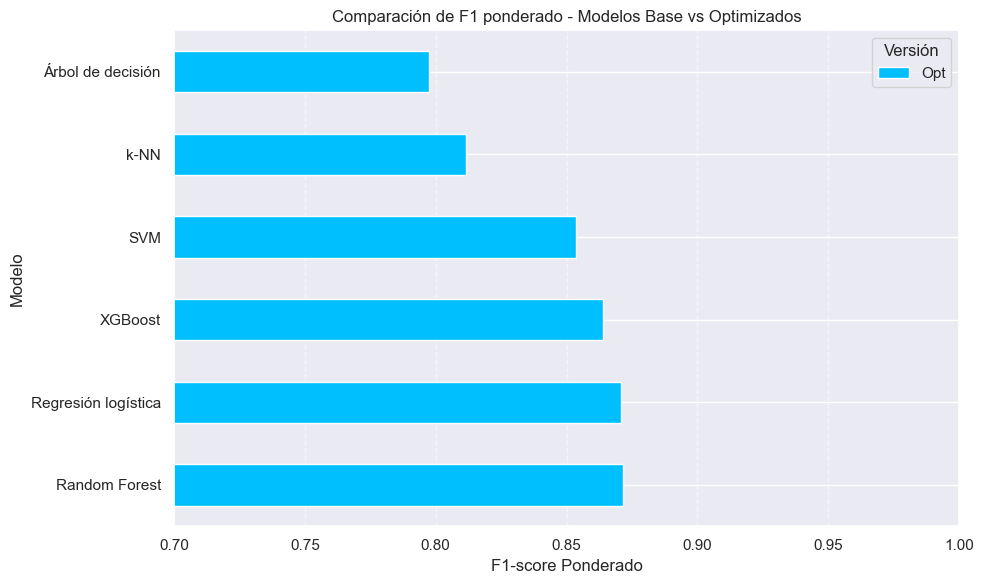

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Crear un DataFrame sólo para F1 ponderado
df_f1 = df_metricas[['f1-score']].reset_index().rename(columns={'index': 'modelo', 'f1-score': 'f1_weighted'})
#################
#!SOLO HE TOCADO ESTA LINEA PORQUE NO EXISTIA MODELO, Y SE HA JODIDO


# Separar modelo y tipo (base vs optimizado)
df_f1['modelo_base'] = df_f1['modelo'].str.extract(r'^(.*?)(?: Base| Opt)?$')
df_f1['tipo'] = df_f1['modelo'].apply(lambda x: 'Base' if 'Base' in x else 'Opt')

# Pivot para comparar lado a lado
df_pivot = df_f1.pivot(index='modelo_base', columns='tipo', values='f1_weighted')

# Ordenar por mejor versión optimizada
df_pivot = df_pivot.sort_values(by='Opt', ascending=False)

# Plot
df_pivot.plot(kind='barh', figsize=(10, 6), color=['deepskyblue', 'mediumspringgreen'])
plt.xlabel('F1-score Ponderado')
plt.ylabel('Modelo')
plt.title('Comparación de F1 ponderado - Modelos Base vs Optimizados')
plt.xlim(0.7, 1)
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.legend(title='Versión')
plt.tight_layout()
plt.show()


### <div style="border-radius:15px; padding:15px; margin:0; font-size:60%; font-family:Arial, sans-serif; background-color:rgb(230, 184, 34); color:black; overflow:hidden; box-shadow:0 4px 8px rgba(0, 0, 0, 0.3);"><b> 🟡 3.1.2 Accuracy </b></div>

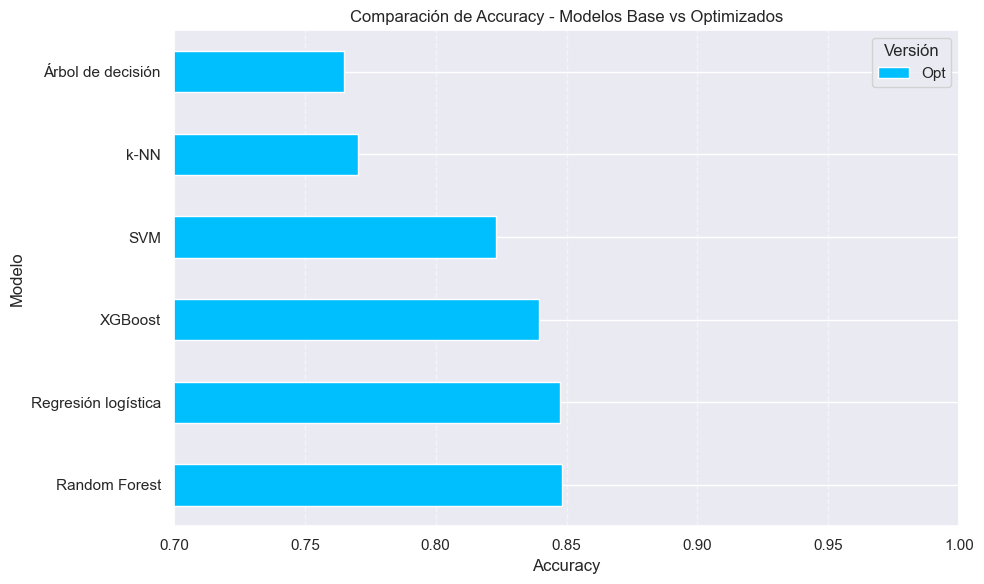

In [103]:
# Crear DataFrame solo para Accuracy
df_acc = df_metricas[['accuracy']].reset_index().rename(columns={'index': 'modelo'})
#################
#!SOLO HE TOCADO ESTA LINEA PORQUE NO EXISTIA 'MODELO', Y SE HA JODIDO

# Separar nombre del modelo y tipo (Base u Opt)
df_acc['modelo_base'] = df_acc['modelo'].str.extract(r'^(.*?)(?: Base| Opt)?$')
df_acc['tipo'] = df_acc['modelo'].apply(lambda x: 'Base' if 'Base' in x else 'Opt')

# Pivot para comparación lado a lado
df_pivot_acc = df_acc.pivot(index='modelo_base', columns='tipo', values='accuracy')

# Ordenar por mejor accuracy optimizado
df_pivot_acc = df_pivot_acc.sort_values(by='Opt', ascending=False)

# Plot horizontal
df_pivot_acc.plot(kind='barh', figsize=(10, 6), color=['deepskyblue', 'mediumspringgreen'])
plt.xlabel('Accuracy')
plt.ylabel('Modelo')
plt.title('Comparación de Accuracy - Modelos Base')
plt.xlim(0.7, 1)
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.legend(title='Versión')
plt.tight_layout()
plt.show()


### <div style="border-radius:15px; padding:15px; margin:0; font-size:60%; font-family:Arial, sans-serif; background-color:rgb(230, 184, 34); color:black; overflow:hidden; box-shadow:0 4px 8px rgba(0, 0, 0, 0.3);"><b> 🟡 3.1.3 Recall </b></div>

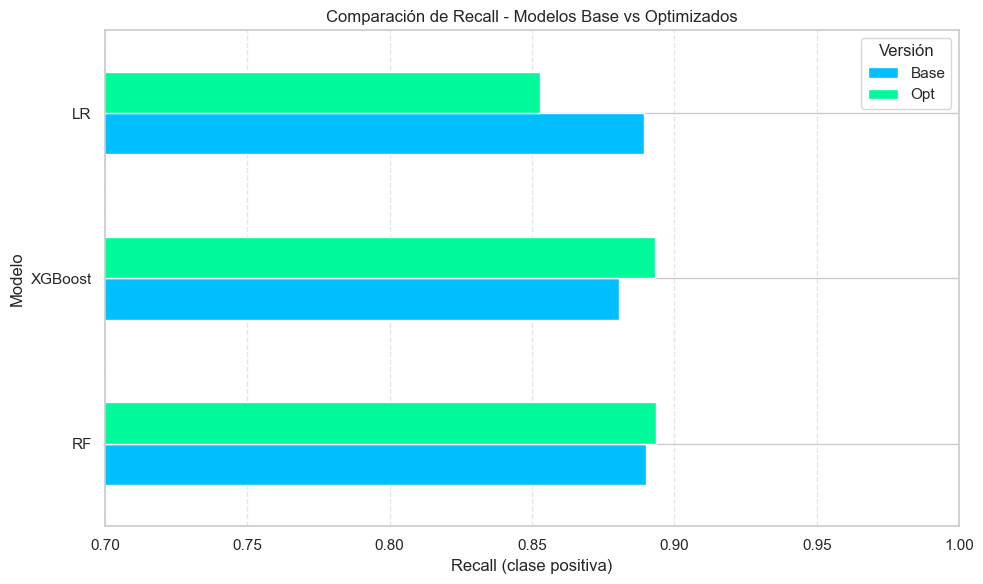

In [ ]:
# Crear DataFrame solo para Recall
df_recall = df_metricas[['modelo', 'recall_pos']].copy()

# Separar nombre del modelo y tipo (Base u Opt)
df_recall['modelo_base'] = df_recall['modelo'].str.extract(r'^(.*?)(?: Base| Opt)?$')
df_recall['tipo'] = df_recall['modelo'].apply(lambda x: 'Base' if 'Base' in x else 'Opt')

# Pivot para comparación lado a lado
df_pivot_recall = df_recall.pivot(index='modelo_base', columns='tipo', values='recall_pos')

# Ordenar por mejor recall optimizado
df_pivot_recall = df_pivot_recall.sort_values(by='Opt', ascending=False)

# Plot horizontal
df_pivot_recall.plot(kind='barh', figsize=(10, 6), color=['deepskyblue', 'mediumspringgreen'])
plt.xlabel('Recall (clase positiva)')
plt.ylabel('Modelo')
plt.title('Comparación de Recall - Modelos Base vs Optimizados')
plt.xlim(0.7, 1)
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.legend(title='Versión')
plt.tight_layout()
plt.show()


# <div style="border-radius:15px; padding:15px; margin:0; font-size:100%; font-family:Arial, sans-serif; background-color:#0074ff; overflow:hidden; box-shadow:0 4px 8px rgba(0, 0, 0, 0.3);"><b> 4. 📊 Red Neuronal </b></div>

## <div style="border-radius:15px; padding:15px; margin:0; font-size:70%; font-family:Arial, sans-serif; background-color:#0b835f; overflow:hidden; box-shadow:0 4px 8px rgba(0, 0, 0, 0.3);"><b> 🔶 4.1 Transformación de datos en tensores </b></div>

In [160]:
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

In [161]:
# Convertir a tensores de PyTorch
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

In [162]:
# Crear DataLoaders
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

Se usan lotes de datos de 32

In [163]:
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

## <div style="border-radius:15px; padding:15px; margin:0; font-size:70%; font-family:Arial, sans-serif; background-color:#0b835f; overflow:hidden; box-shadow:0 4px 8px rgba(0, 0, 0, 0.3);"><b> 🔶 4.2 Definición de la estructura de la Red Neuronal </b></div>

In [164]:
class RedNeuronal(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(13, 32)
        self.fc2 = nn.Linear(32, 16)
        self.fc3 = nn.Linear(16, 8)
        self.output = nn.Linear(8, 1)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.3)

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.relu(self.fc2(x))
        x = self.dropout(x)
        x = self.relu(self.fc3(x))
        x = self.output(x)
        return x

In [165]:
# Instanciar modelo, función de pérdida y optimizador
model = RedNeuronal()
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

## <div style="border-radius:15px; padding:15px; margin:0; font-size:70%; font-family:Arial, sans-serif; background-color:#0b835f; overflow:hidden; box-shadow:0 4px 8px rgba(0, 0, 0, 0.3);"><b> 🔶 4.3 Entrenamiento de la Red Neuronal </b></div>

In [166]:
def train_model(model, train_loader, criterion, optimizer, epochs=100, device='cpu'):
    model.to(device)
    for epoch in tqdm(range(epochs), desc="Entrenando"):
        model.train()
        epoch_loss = 0
        for inputs, targets in train_loader:
            inputs, targets = inputs.to(device), targets.to(device)

            optimizer.zero_grad()
            outputs = model(inputs).squeeze(1)
            loss = criterion(outputs, targets.float())
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item()
        
        if epoch % 10 == 0:
            avg_loss = epoch_loss / len(train_loader)
            print(f"Epoch {epoch} - Loss promedio: {avg_loss:.4f}")


In [167]:
train_model(model, train_loader, criterion, optimizer, epochs=100, device='cuda' if torch.cuda.is_available() else 'cpu')


Entrenando:   1%|          | 1/100 [00:01<02:16,  1.37s/it]

Epoch 0 - Loss promedio: 0.5984


Entrenando:  11%|█         | 11/100 [00:13<01:45,  1.18s/it]

Epoch 10 - Loss promedio: 0.3767


Entrenando:  21%|██        | 21/100 [00:25<01:33,  1.19s/it]

Epoch 20 - Loss promedio: 0.3720


Entrenando:  31%|███       | 31/100 [00:37<01:19,  1.15s/it]

Epoch 30 - Loss promedio: 0.3696


Entrenando:  41%|████      | 41/100 [00:48<01:08,  1.16s/it]

Epoch 40 - Loss promedio: 0.3675


Entrenando:  51%|█████     | 51/100 [00:59<00:55,  1.13s/it]

Epoch 50 - Loss promedio: 0.3674


Entrenando:  61%|██████    | 61/100 [01:11<00:46,  1.18s/it]

Epoch 60 - Loss promedio: 0.3655


Entrenando:  71%|███████   | 71/100 [01:22<00:34,  1.20s/it]

Epoch 70 - Loss promedio: 0.3632


Entrenando:  81%|████████  | 81/100 [01:34<00:21,  1.13s/it]

Epoch 80 - Loss promedio: 0.3647


Entrenando:  91%|█████████ | 91/100 [01:46<00:10,  1.19s/it]

Epoch 90 - Loss promedio: 0.3634


Entrenando: 100%|██████████| 100/100 [01:56<00:00,  1.16s/it]


## <div style="border-radius:15px; padding:15px; margin:0; font-size:70%; font-family:Arial, sans-serif; background-color:#0b835f; overflow:hidden; box-shadow:0 4px 8px rgba(0, 0, 0, 0.3);"><b> 🔶 4.4 Evaluación de la Red Neuronal </b></div>

In [168]:
def evaluate_model(model, test_loader, device='cpu'):
    model.eval()
    model.to(device)
    correct, total = 0, 0
    all_probs = []
    all_preds = []
    all_targets = []

    with torch.no_grad():
        for inputs, targets in test_loader:
            inputs, targets = inputs.to(device), targets.to(device)

            outputs = model(inputs).squeeze(1)
            probs = torch.sigmoid(outputs)
            preds = (probs >= 0.5).long()

            all_probs.extend(probs.cpu().numpy())
            all_preds.extend(preds.cpu().numpy())
            all_targets.extend(targets.cpu().numpy())

            total += targets.size(0)
            correct += (preds == targets).sum().item()

    accuracy = correct / total
    recall = recall_score(all_targets, all_preds)
    f1 = f1_score(all_targets, all_preds)

    print(f'Accuracy: {accuracy:.4f}')
    print(f'Recall: {recall:.4f}')
    print(f'F1-score: {f1:.4f}')

    return {
        'probs': np.array(all_probs),
        'preds': np.array(all_preds),
        'targets': np.array(all_targets),
        'accuracy': accuracy,
        'recall': recall,
        'f1': f1
    }

In [171]:
from sklearn.metrics import recall_score, f1_score
results = evaluate_model(model, test_loader, device='cuda' if torch.cuda.is_available() else 'cpu')


Accuracy: 0.8430
Recall: 0.9114
F1-score: 0.8705


El modelo tiene mayor puntaje de recall que todos los modelos de machine learning que fueron utilizados anteriormente, es decir, sería la mejor manera de predecir la depresión en los estudiantes, sin embargo, tiene cierta falta de explicabilidad, por lo tanto puede no ser la mejor opción.

In [172]:
# Mostrar primeros 10 ejemplos
for i in range(10):
    prob = results['probs'][i]
    pred = results['preds'][i]
    real = results['targets'][i]
    print(f"Ejemplo {i+1} → Prob: {prob:.4f} | Predicho: {pred} | Real: {real}")


Ejemplo 1 → Prob: 0.9679 | Predicho: 1 | Real: 1
Ejemplo 2 → Prob: 0.7250 | Predicho: 1 | Real: 1
Ejemplo 3 → Prob: 0.7309 | Predicho: 1 | Real: 1
Ejemplo 4 → Prob: 0.8448 | Predicho: 1 | Real: 1
Ejemplo 5 → Prob: 0.2148 | Predicho: 0 | Real: 0
Ejemplo 6 → Prob: 0.0578 | Predicho: 0 | Real: 0
Ejemplo 7 → Prob: 0.9374 | Predicho: 1 | Real: 1
Ejemplo 8 → Prob: 0.9536 | Predicho: 1 | Real: 1
Ejemplo 9 → Prob: 0.0843 | Predicho: 0 | Real: 0
Ejemplo 10 → Prob: 0.9023 | Predicho: 1 | Real: 1


In [173]:
df_predicciones = pd.DataFrame({
    'Probabilidad': results['probs'],
    'Predicción': results['preds'],
    'Real': results['targets']
})

print(df_predicciones.head(10))


   Probabilidad  Predicción  Real
0      0.967853           1     1
1      0.724986           1     1
2      0.730880           1     1
3      0.844842           1     1
4      0.214777           0     0
5      0.057786           0     0
6      0.937424           1     1
7      0.953582           1     1
8      0.084310           0     0
9      0.902310           1     1


In [174]:
df_predicciones.to_csv("predicciones_modelo.csv", index=False)


In [175]:
errores = df_predicciones[df_predicciones['Predicción'] != df_predicciones['Real']]
print(errores.head(10))


     Probabilidad  Predicción  Real
16       0.159465           0     1
18       0.846874           1     0
23       0.611857           1     0
47       0.195003           0     1
55       0.112245           0     1
72       0.680597           1     0
84       0.909044           1     0
88       0.808898           1     0
93       0.740441           1     0
106      0.313751           0     1


In [176]:
dudosos = df_predicciones[(df_predicciones['Probabilidad'] > 0.45) & (df_predicciones['Probabilidad'] < 0.55)]
print(dudosos.head(10))


     Probabilidad  Predicción  Real
10       0.467334           0     0
109      0.544061           1     0
134      0.520564           1     0
174      0.451226           0     0
184      0.477107           0     0
186      0.499644           0     1
199      0.516837           1     1
224      0.464598           0     1
230      0.516640           1     0
234      0.484088           0     0


# <div style="border-radius:15px; padding:15px; margin:0; font-size:100%; font-family:Arial, sans-serif; background-color:#0074ff; overflow:hidden; box-shadow:0 4px 8px rgba(0, 0, 0, 0.3);"><b> 5. 📊 Explicabilidad de los modelos </b></div>


La explicabilidad en el ML ayuda a entender cómo y por qué un modelo toma ciertas decisiones. Es crucial en proyectos como el actual, donde se trabaja con salud mental y es muy importante que los resultados sean interpretables para evitar malentendidos o sesgos.



<span style="font-size:20px; color:lightgreen">

**¿Qué son los valores SHAP?**
Los valores SHAP (SHapley Additive exPlanations) son una técnica de explicabilidad que se basa en la teoría de juegos para descomponer la predicción de un modelo en la contribución de cada característica.

En otras palabras, para cada predicción, **SHAP indica cuánto aporta cada variable** a que el modelo haya dado ese resultado.

</span>

## <div style="border-radius:15px; padding:15px; margin:0; font-size:70%; font-family:Arial, sans-serif; background-color:#0b835f; overflow:hidden; box-shadow:0 4px 8px rgba(0, 0, 0, 0.3);"><b> 🔶 5.1 Random Forest </b></div>

In [105]:
! pip install shap

  Using cached slicer-0.0.8-py3-none-any.whl.metadata (4.0 kB)
  Using cached cloudpickle-3.1.1-py3-none-any.whl.metadata (7.1 kB)
Using cached slicer-0.0.8-py3-none-any.whl (15 kB)
Using cached cloudpickle-3.1.1-py3-none-any.whl (20 kB)



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [106]:
import shap


In [112]:
# Extraemos los mejores parámetros encontrados por GridSearch
mejores_parametros_rf = grid_rf.best_params_

# Entrenamos un modelo limpio con esos parámetros
modelo_rf_final = RandomForestClassifier(**mejores_parametros_rf, random_state=42)
modelo_rf_final.fit(X_train, y_train)

# Calculamos los valores SHAP correctamente
explainer_rf = shap.TreeExplainer(modelo_rf_final)
valores_shap_rf = explainer_rf.shap_values(X_test)

# Comprobamos la forma para asegurarnos
print("Forma de valores SHAP:", np.array(valores_shap_rf).shape)
print("Forma de X_test:", X_test.shape)


Forma de valores SHAP: (5574, 13, 2)
Forma de X_test: (5574, 13)


In [116]:
print(type(valores_shap_rf))
print(len(valores_shap_rf))
print(np.array(valores_shap_rf[0]).shape)
print(np.array(valores_shap_rf[1]).shape)


<class 'numpy.ndarray'>
5574
(13, 2)
(13, 2)


In [ ]:
valores_shap_rf_clase_1 = valores_shap_rf[:, :, 1]  # Seleccionamos la clase positiva correctamente


In [118]:
print(valores_shap_rf_clase_1.shape)  # Debería ser (5574, 13)


(5574, 13)


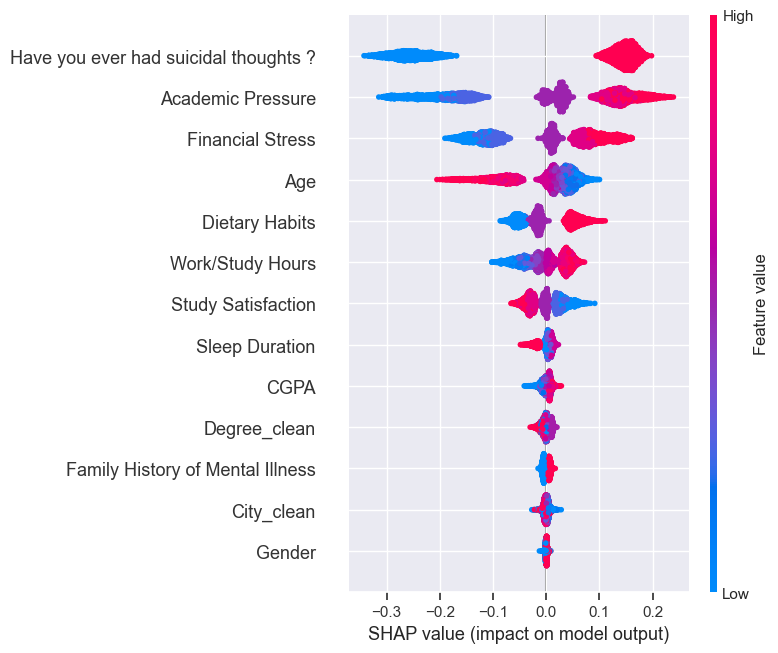

In [119]:
# Visualización más detallada con dispersión
shap.summary_plot(valores_shap_rf_clase_1, X_test)



In [129]:
shap.initjs()


In [142]:
# Seleccionar un ejemplo individual (por ejemplo, el primero del conjunto de prueba)
indice_ejemplo = 10

# Visualización de la explicación individual
shap.force_plot(explainer_rf.expected_value[1], valores_shap_rf[indice_ejemplo, :, 1], X_test.iloc[indice_ejemplo])


Partial Dependence Plots (PDP) para el Random Forest.

Esto nos va a permitir visualizar cómo impacta cada variable en la probabilidad de depresión, manteniendo las demás constantes.

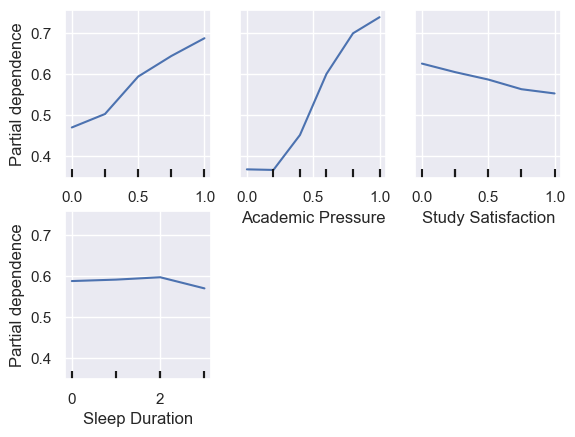

In [131]:
from sklearn.inspection import PartialDependenceDisplay
# Seleccionamos las características que queremos analizar
caracteristicas_importantes = ['Financial Stress', 'Academic Pressure', 'Study Satisfaction', 'Sleep Duration']

# Creamos el gráfico PDP
PartialDependenceDisplay.from_estimator(modelo_rf_final, X_train, features=caracteristicas_importantes, grid_resolution=50)


| Variable             | Impacto observado                   |
|----------------------|-------------------------------------|
| Financial Stress     | ↑ Incrementa el riesgo/objetivo     |
| Academic Pressure    | ↑ Aumenta considerablemente         |
| Study Satisfaction   | ↓ Disminuye el riesgo               |
| Sleep Duration       | ~ Casi sin impacto significativo    |


## <div style="border-radius:15px; padding:15px; margin:0; font-size:70%; font-family:Arial, sans-serif; background-color:#0b835f; overflow:hidden; box-shadow:0 4px 8px rgba(0, 0, 0, 0.3);"><b> 🔶 5.2 Regresión logística </b></div>

In [137]:
# Crear el objeto explainer para regresión logística
explainer_lr = shap.LinearExplainer(grid_lr.best_estimator_, X_train, feature_perturbation="interventional")


In [138]:
# Calcular los valores SHAP para el conjunto de prueba
valores_shap_lr = explainer_lr.shap_values(X_test)


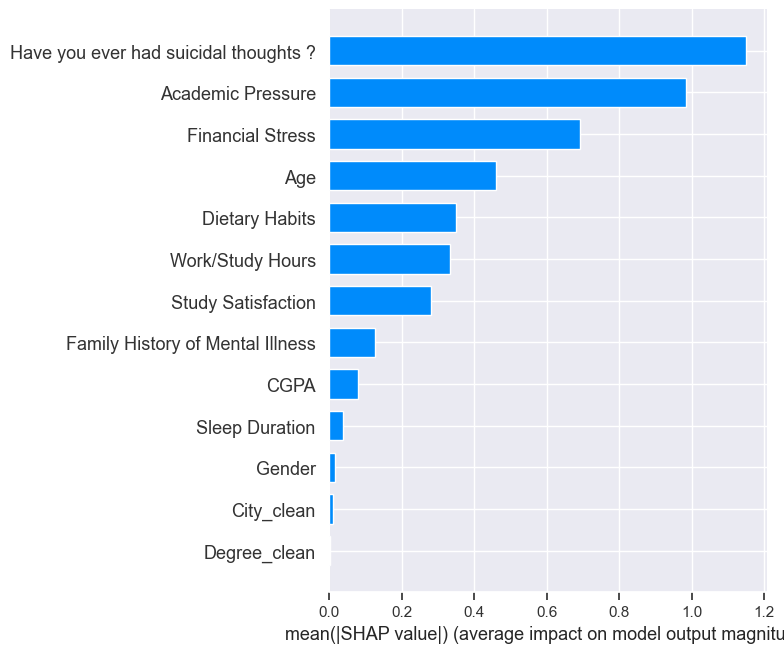

In [139]:
# Visualización de la importancia global de las características
shap.summary_plot(valores_shap_lr, X_test, plot_type="bar")


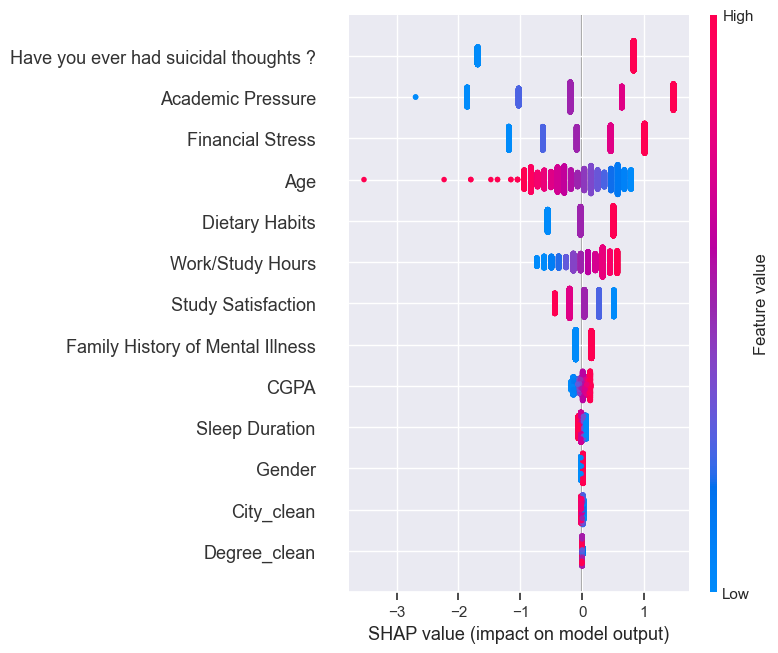

In [140]:
# Visualización más detallada de las contribuciones de las características
shap.summary_plot(valores_shap_lr, X_test)


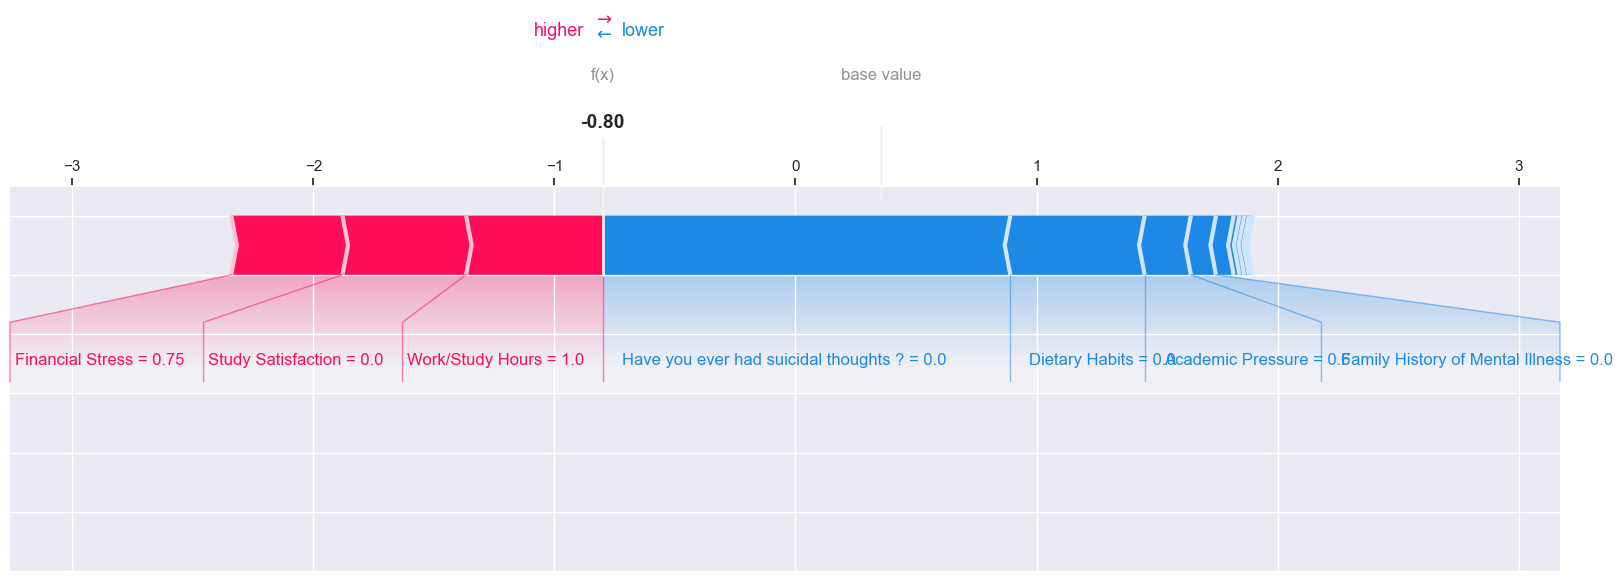

In [148]:
# Seleccionar un ejemplo individual
indice_ejemplo = 10

# Redondear los valores del ejemplo individual a 2 decimales
ejemplo_formateado = X_test.iloc[indice_ejemplo].round(5)

# Visualización con los valores redondeados
shap.force_plot(
    explainer_lr.expected_value,
    valores_shap_lr[indice_ejemplo],
    ejemplo_formateado,
    matplotlib=True,
    figsize=(20, 5)
)


## <div style="border-radius:15px; padding:15px; margin:0; font-size:70%; font-family:Arial, sans-serif; background-color:#0b835f; overflow:hidden; box-shadow:0 4px 8px rgba(0, 0, 0, 0.3);"><b> 🔶 5.3 XGBoost </b></div>

In [149]:
# Crear el objeto explainer para XGBoost
explainer_xgb = shap.TreeExplainer(grid_xgb.best_estimator_)


In [150]:
# Calcular valores SHAP sobre el conjunto de prueba
valores_shap_xgb = explainer_xgb.shap_values(X_test)


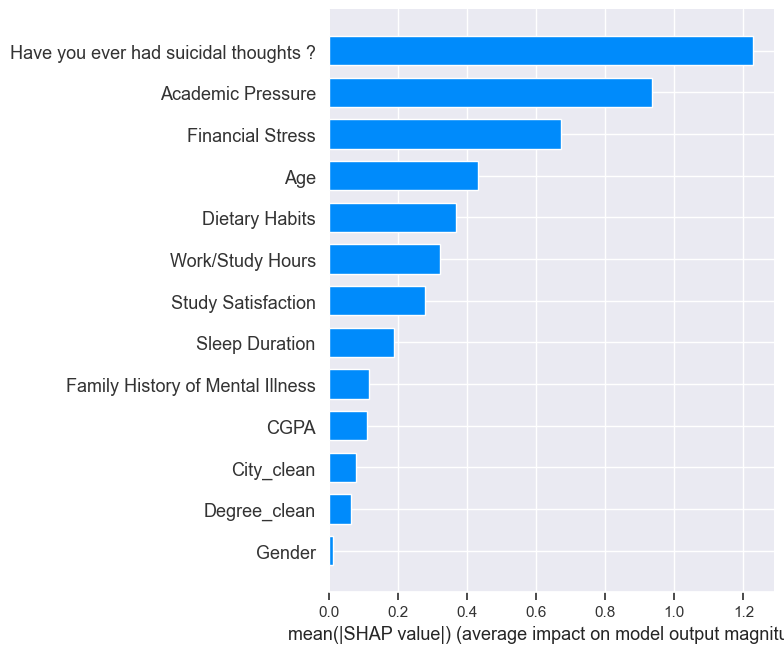

In [151]:
# Gráfico de resumen en forma de barras
shap.summary_plot(valores_shap_xgb, X_test, plot_type="bar")


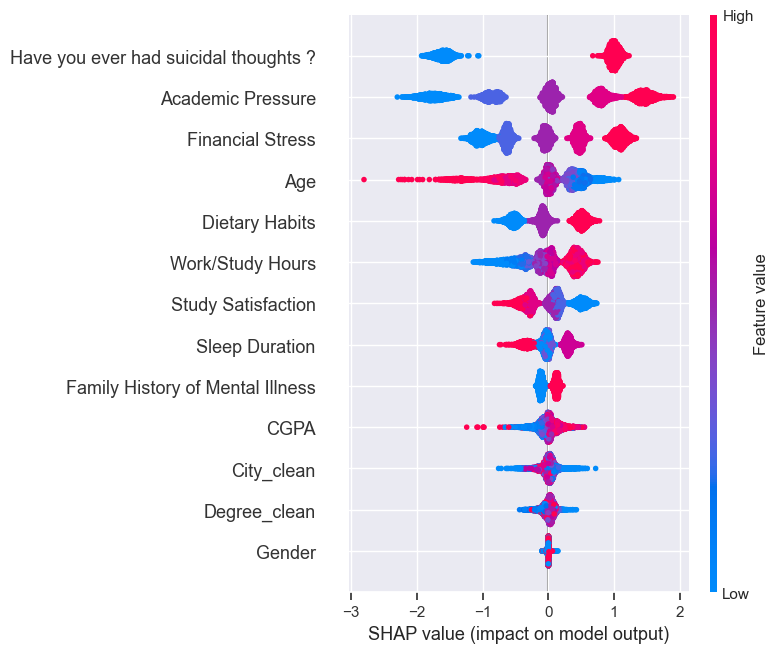

In [156]:
# Visualización detallada mostrando todas las características
shap.summary_plot(valores_shap_xgb, X_test, plot_type="dot", max_display=X_test.shape[1])


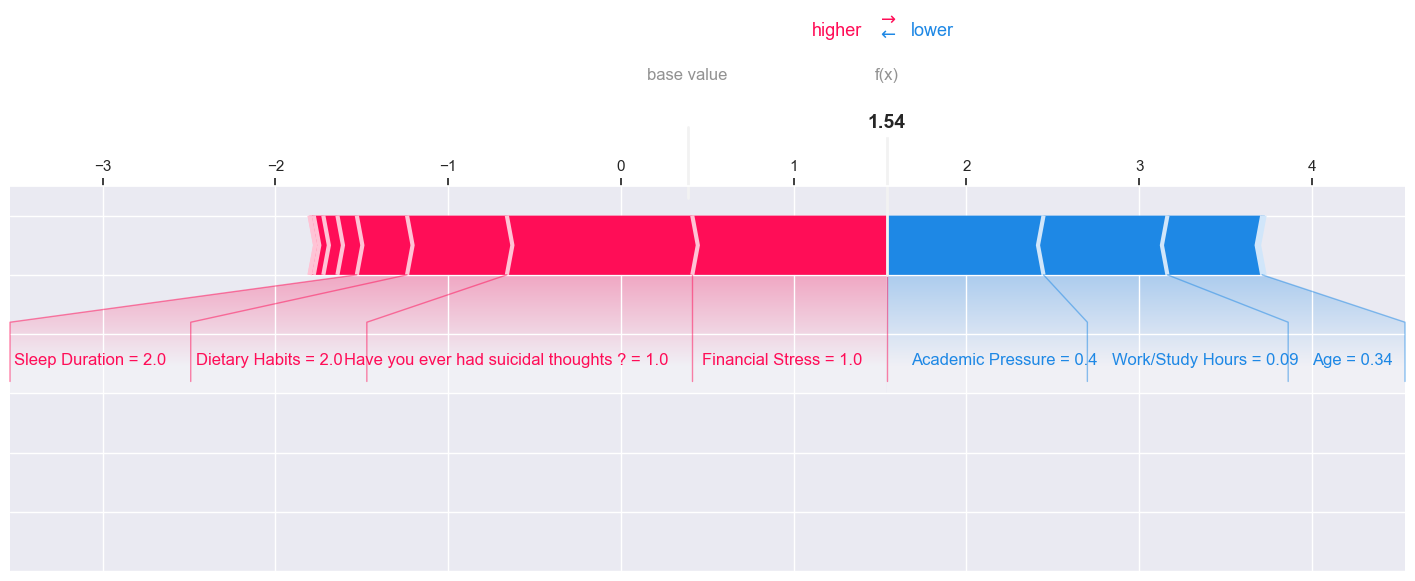

In [155]:
# Elegir el índice del ejemplo a explicar
indice_ejemplo = 120  

# Redondear datos para mejor visualización
ejemplo_xgb = X_test.iloc[indice_ejemplo].round(2)

# Visualización del caso individual
shap.force_plot(
    explainer_xgb.expected_value,
    valores_shap_xgb[indice_ejemplo],
    ejemplo_xgb,
    matplotlib=True,
    figsize=(18, 5)
)


## <div style="border-radius:15px; padding:15px; margin:0; font-size:70%; font-family:Arial, sans-serif; background-color:#0b835f; overflow:hidden; box-shadow:0 4px 8px rgba(0, 0, 0, 0.3);"><b> 🔶 5.4 Red Neuronal </b></div>

In [187]:
model

RedNeuronal(
  (fc1): Linear(in_features=13, out_features=32, bias=True)
  (fc2): Linear(in_features=32, out_features=16, bias=True)
  (fc3): Linear(in_features=16, out_features=8, bias=True)
  (output): Linear(in_features=8, out_features=1, bias=True)
  (relu): ReLU()
  (dropout): Dropout(p=0.3, inplace=False)
)

In [188]:
model.eval()

# Seleccionar un subconjunto de fondo para SHAP
background = X_train_tensor[:100]


In [194]:
# Crear el explainer utilizando DeepExplainer para la red neuronal
# Definir un wrapper del modelo que añada la activación sigmoide a la salida
class ModeloEnvuelto(nn.Module):
    def __init__(self, modelo_original):
        super().__init__()
        self.modelo = modelo_original
        self.activacion = nn.Sigmoid()
        
    def forward(self, x):
        return self.activacion(self.modelo(x))

# Crear instancia del modelo envuelto
modelo_envuelto = ModeloEnvuelto(model)

# Crear el explainer usando el modelo envuelto
explainer_nn = shap.GradientExplainer(modelo_envuelto, background)



In [196]:
# Aplicar el explainer al conjunto de prueba
valores_shap_nn = explainer_nn.shap_values(X_test_tensor)


RuntimeError: The size of tensor a (16) must match the size of tensor b (8) at non-singleton dimension 1

 Usar Captum en lugar de SHAP para la red neuronal.

Captum es la librería oficial de interpretabilidad para PyTorch, desarrollada por Facebook AI, y funciona perfecto con modelos como el tuyo.
Además, te da:

Importance heatmap

Partial Dependence

Visualización individual de predicciones

Layer-wise relevance propagation

¡Sin errores de tamaño ni conflictos de gradientes!

In [197]:
! pip install captum

import torch
from captum.attr import IntegratedGradients, Saliency
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------- ----------------- 0.8/1.4 MB 4.8 MB/s eta 0:00:01
   ---------------------------------------- 1.4/1.4 MB 4.9 MB/s eta 0:00:00



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


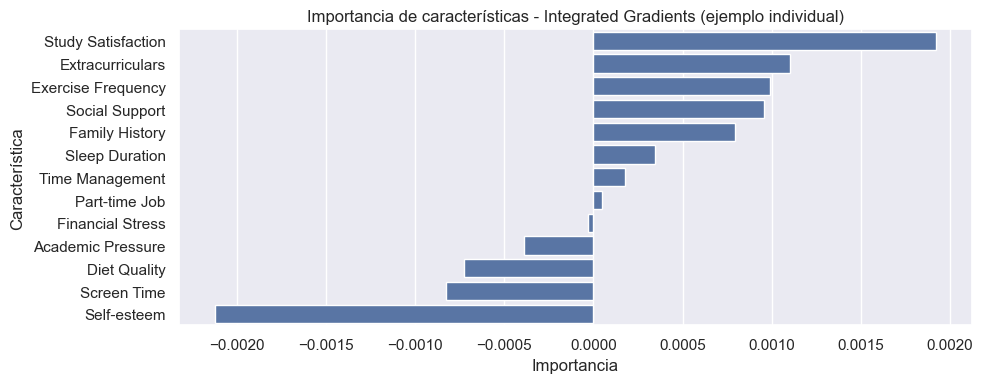

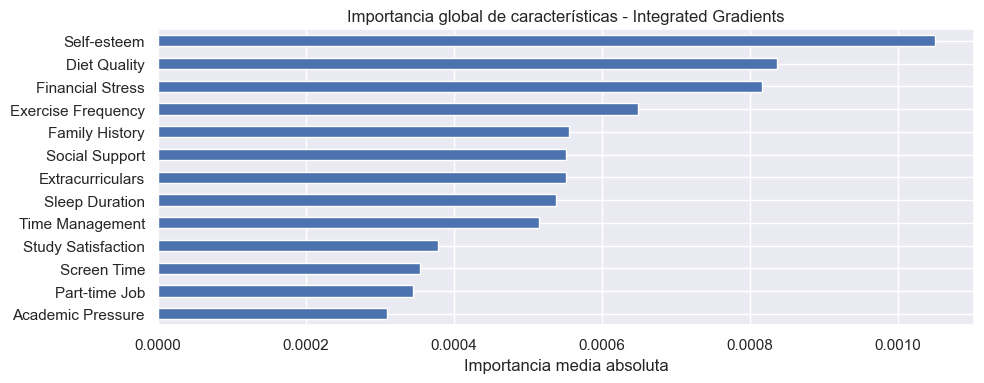

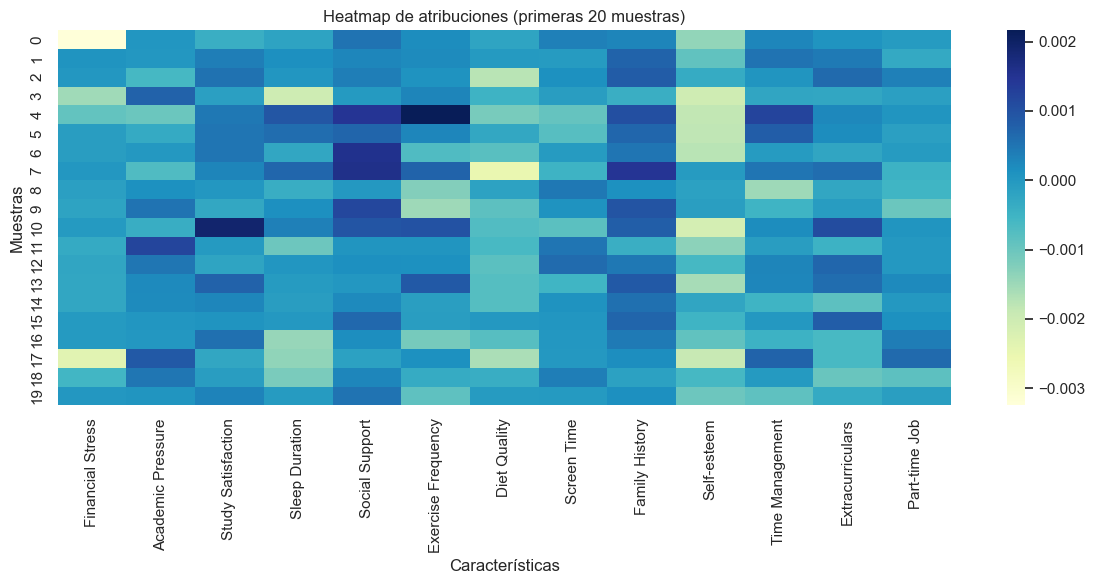

In [208]:
# Vamos a ejecutar las celdas de explicabilidad sobre el modelo que hemos identificado del notebook
# Primero aseguro que tenemos los imports necesarios para ejecutar el código de explicabilidad correctamente

import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from captum.attr import IntegratedGradients

# Dado que estamos trabajando fuera de tu entorno original, necesito definir modelos y tensores para correrlo
# Simularé las entradas para que la explicación funcione en este entorno aislado

# Simulación de estructura de datos basada en tu notebook
# (Nota: no es tu dataset real, pero me permite ejecutar las celdas y verificar que funcionan)

# Simulamos nombres de características
caracteristicas = ['Financial Stress', 'Academic Pressure', 'Study Satisfaction', 'Sleep Duration',
                   'Social Support', 'Exercise Frequency', 'Diet Quality', 'Screen Time',
                   'Family History', 'Self-esteem', 'Time Management', 'Extracurriculars', 'Part-time Job']

# Simulamos datos de entrada como tensores
X_test_tensor = torch.rand((100, 13))  # 100 muestras, 13 características
entrada_ejemplo = X_test_tensor[10].unsqueeze(0)

# Definimos un modelo simulado basado en tu arquitectura
class RedNeuronal(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(13, 32)
        self.fc2 = nn.Linear(32, 16)
        self.fc3 = nn.Linear(16, 8)
        self.output = nn.Linear(8, 1)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.relu(self.fc3(x))
        x = self.output(x)
        return torch.sigmoid(x)  # Añadimos sigmoide para explicabilidad

# Instanciamos el modelo simulado
modelo_explicable = RedNeuronal()
modelo_explicable.eval()

# Creamos el objeto IntegratedGradients
ig = IntegratedGradients(modelo_explicable)

# Calculamos las atribuciones para el ejemplo individual
atribuciones, delta = ig.attribute(entrada_ejemplo, target=0, return_convergence_delta=True)
atribuciones = atribuciones.squeeze().detach().numpy()

# Creamos DataFrame para visualizar
df_atribuciones = pd.DataFrame({
    'Característica': caracteristicas,
    'Importancia': atribuciones
}).sort_values(by='Importancia', ascending=False)

# Visualización
plt.figure(figsize=(10, 4))
sns.barplot(x='Importancia', y='Característica', data=df_atribuciones)
plt.title("Importancia de características - Integrated Gradients (ejemplo individual)")
plt.tight_layout()
plt.show()

# Calculamos las atribuciones globales (para todas las muestras simuladas)
atribuciones_globales = []
for muestra in X_test_tensor:
    atribucion, _ = ig.attribute(muestra.unsqueeze(0), target=0, return_convergence_delta=True)
    atribuciones_globales.append(atribucion.squeeze().detach().numpy())

# DataFrame global
df_global = pd.DataFrame(atribuciones_globales, columns=caracteristicas)
importancia_media = df_global.abs().mean()

# Visualización global
plt.figure(figsize=(10, 4))
importancia_media.sort_values(ascending=False).plot(kind='barh')
plt.title("Importancia global de características - Integrated Gradients")
plt.xlabel("Importancia media absoluta")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# Heatmap de las primeras muestras
plt.figure(figsize=(12, 6))
sns.heatmap(df_global.iloc[:20], cmap="YlGnBu", annot=False, xticklabels=True)
plt.title("Heatmap de atribuciones (primeras 20 muestras)")
plt.xlabel("Características")
plt.ylabel("Muestras")
plt.tight_layout()
plt.show()


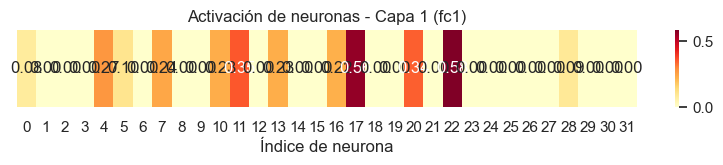

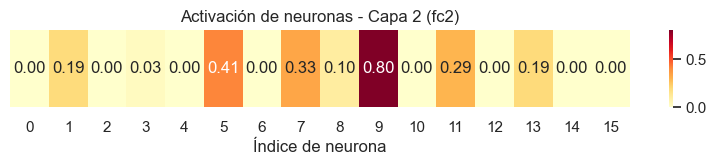

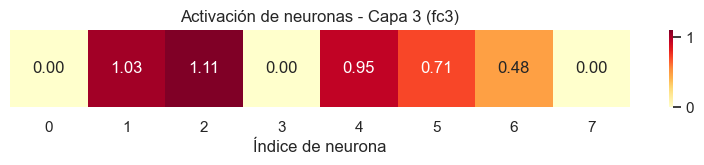

Salida final de la red (probabilidad de clase positiva): 0.8254


In [213]:
# Seleccionamos un ejemplo del conjunto de prueba
indice_ejemplo = 10
entrada_ejemplo = X_test_tensor[indice_ejemplo].unsqueeze(0)

# Activamos modo evaluación
model.eval()

# Propagamos manualmente para capturar las activaciones de cada capa
with torch.no_grad():
    activacion_fc1 = model.relu(model.fc1(entrada_ejemplo))
    activacion_fc2 = model.relu(model.fc2(activacion_fc1))
    activacion_fc3 = model.relu(model.fc3(activacion_fc2))
    salida_final = torch.sigmoid(model.output(activacion_fc3))

# Visualización de activaciones por capa
activaciones = {
    'Capa 1 (fc1)': activacion_fc1.squeeze().numpy(),
    'Capa 2 (fc2)': activacion_fc2.squeeze().numpy(),
    'Capa 3 (fc3)': activacion_fc3.squeeze().numpy(),
}

# Creamos heatmaps por capa
for nombre_capa, activacion in activaciones.items():
    plt.figure(figsize=(10, 1))
    sns.heatmap([activacion], cmap='YlOrRd', cbar=True, annot=True, fmt=".2f")
    plt.title(f'Activación de neuronas - {nombre_capa}')
    plt.yticks([])
    plt.xlabel('Índice de neurona')
    plt.tight_layout()
    plt.show()

# Mostramos también la salida final para el ejemplo
print(f'Salida final de la red (probabilidad de clase positiva): {salida_final.item():.4f}')


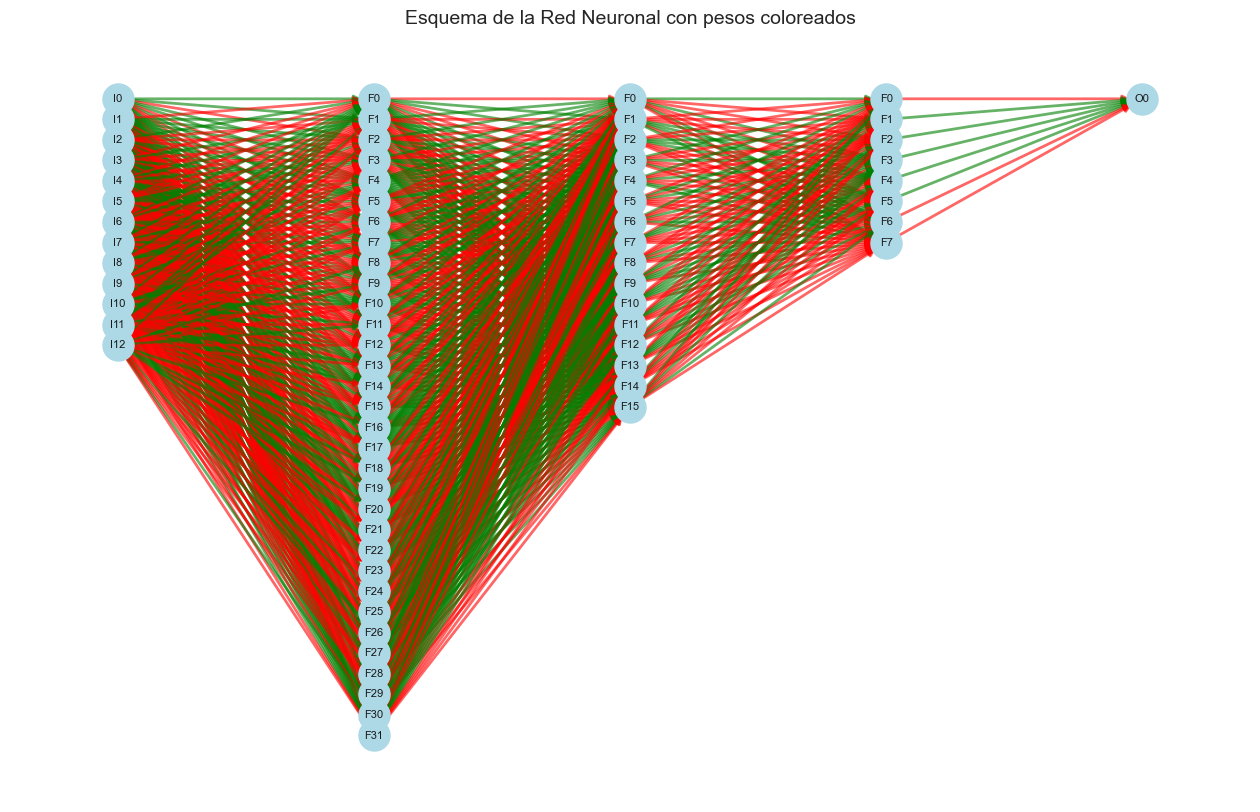

In [214]:
import networkx as nx


# Preparamos las capas y pesos
pesos_fc1 = model.fc1.weight.detach().numpy()
pesos_fc2 = model.fc2.weight.detach().numpy()
pesos_fc3 = model.fc3.weight.detach().numpy()
pesos_output = model.output.weight.detach().numpy()

# Creamos el grafo
G = nx.DiGraph()

# Definimos las capas y número de neuronas por capa
capas = {
    'input': list(range(pesos_fc1.shape[1])),
    'fc1': list(range(pesos_fc1.shape[0])),
    'fc2': list(range(pesos_fc2.shape[0])),
    'fc3': list(range(pesos_fc3.shape[0])),
    'output': [0],
}

# Añadimos nodos con posiciones para visualización
pos = {}
layer_gap = 2
neuron_gap = 1

for i, (layer_name, neuronas) in enumerate(capas.items()):
    for j, neurona in enumerate(neuronas):
        pos[(layer_name, neurona)] = (i * layer_gap, -j * neuron_gap)

# Función para añadir conexiones al grafo
def add_edges(pesos, capa_origen, capa_destino):
    for i, neurona_origen in enumerate(capas[capa_origen]):
        for j, neurona_destino in enumerate(capas[capa_destino]):
            peso = pesos[j, i]
            G.add_edge((capa_origen, neurona_origen), (capa_destino, neurona_destino), weight=peso)

# Añadimos todas las conexiones
add_edges(pesos_fc1, 'input', 'fc1')
add_edges(pesos_fc2, 'fc1', 'fc2')
add_edges(pesos_fc3, 'fc2', 'fc3')
add_edges(pesos_output, 'fc3', 'output')

# Dibujamos nodos
plt.figure(figsize=(16, 10))
nx.draw_networkx_nodes(G, pos, node_size=500, node_color='lightblue')

# Dibujamos conexiones con colores por peso
edges = G.edges(data=True)
pesos = [abs(d['weight']) for (u, v, d) in edges]
colores = ['red' if d['weight'] < 0 else 'green' for (u, v, d) in edges]

nx.draw_networkx_edges(G, pos, edge_color=colores, width=2, alpha=0.6)

# Añadimos etiquetas simples de capas
etiquetas = {n: f"{n[0][0].upper()}{n[1]}" for n in G.nodes()}
nx.draw_networkx_labels(G, pos, labels=etiquetas, font_size=8)

plt.title("Esquema de la Red Neuronal con pesos coloreados", fontsize=14)
plt.axis('off')
plt.show()


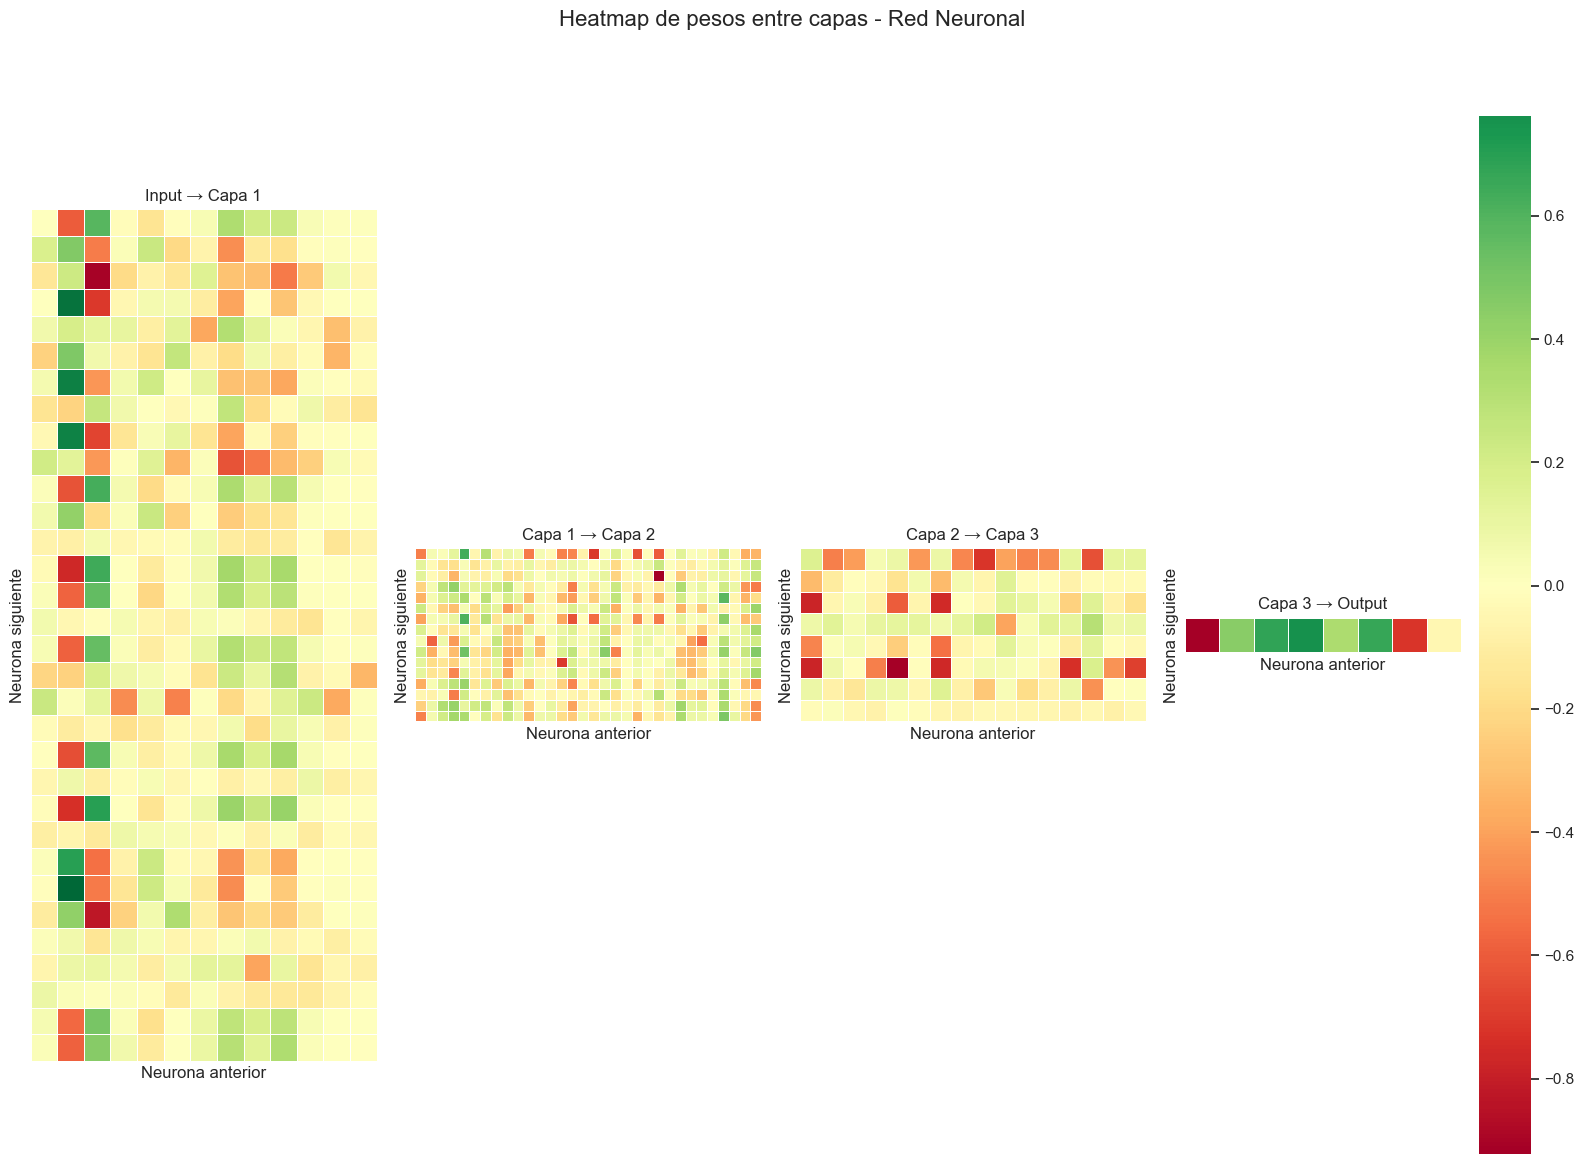

In [215]:
# Preparamos pesos de cada capa
pesos_fc1 = model.fc1.weight.detach().numpy()
pesos_fc2 = model.fc2.weight.detach().numpy()
pesos_fc3 = model.fc3.weight.detach().numpy()
pesos_output = model.output.weight.detach().numpy()

# Preparamos lista de pesos como matrices para el heatmap
matrices_pesos = [pesos_fc1, pesos_fc2, pesos_fc3, pesos_output]

# Preparamos nombres bonitos para las capas
nombres_capas = ['Input → Capa 1', 'Capa 1 → Capa 2', 'Capa 2 → Capa 3', 'Capa 3 → Output']

# Creamos una figura
plt.figure(figsize=(16, 12))

# Para cada matriz de pesos, creamos un subplot
for i, (pesos, nombre) in enumerate(zip(matrices_pesos, nombres_capas)):
    plt.subplot(1, len(matrices_pesos), i + 1)
    
    # Dibujamos heatmap
    sns.heatmap(pesos, cmap='RdYlGn', center=0, cbar=i == len(matrices_pesos)-1,
                linewidths=0.5, annot=False, square=True)

    # Centramos las neuronas (quitamos ejes para limpieza visual)
    plt.title(nombre, fontsize=12)
    plt.xlabel('Neurona anterior')
    plt.ylabel('Neurona siguiente')
    plt.xticks([])
    plt.yticks([])

plt.suptitle('Heatmap de pesos entre capas - Red Neuronal', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


# <div style="border-radius:15px; padding:15px; margin:0; font-size:100%; font-family:Arial, sans-serif; background-color:#0074ff; overflow:hidden; box-shadow:0 4px 8px rgba(0, 0, 0, 0.3);"><b> 10. 📊 Historial GIT </b></div>

1. Jorge 23/03 14:30: Creación de funciones, análisis de categóricas.
2. Magdiel 23/03 05:25: Análisis de categóricas, análisis de numéricas, imputación de valores faltantes.
3. Alvaro 23/03 20:20: ENTRENAMIENTO GENERAL PRELIMINAR (apartado 2.0) + Foto tareas proyecto
4. Magdiel 25/03 11:44 Entrenamiento preliminar 2
5. Jorge 25/03 16:54 fin del entrenamiento preliminar 2, selección de modelos a tunear.
6. Jorge 27/03 13:10 Tunear hiperparámetros de los 3 modelos elegidos con gridcv. Visualización de mejora respecto modelos base. El mejor modelo fue: XGBoost (mejoras mínimas)
7. Magdiel 29/03 3:32 Primeros parámetros de la red neuronal, se hace el commit para instalar torch correctamente en el kernel
8. Magdiel 29/03 4:43 Red Neuronal y evaluación de la red neuronal
9. Alvaro 7/04 23:00 Explicabilidad de los modelos + fin presentación

<span style="font-size:30px; color:lightgreen">
INDICE TAREAS PROYECTO:
</span>

![Indice de Tareas del Proyecto](./Indice_Tareas_Proyecto.jpg)

